## Problem Statement: Concrete Strength Prediction

### Objective:

#### To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

### DataSet Description as provided in the problem statement:-
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
#### Data set is in concrete.csv
1. 	Cement (cement) 	quantitative 	kg in a m3 mixture 	Input Variable
2. 	Blast Furnace Slag (slag) 	quantitative 	kg in a m3 mixture 	Input Variable
3. 	Fly Ash (ash) 	quantitative 	kg in a m3 mixture 	Input Variable
4. 	Water(water) 	quantitative 	kg in a m3 mixture 	Input Variable
5. 	Superplasticizer (superplastic) 	quantitative 	kg in a m3 mixture 	Input Variable
6. 	Coarse Aggregate (coarseagg) 	quantitative 	kg in a m3 mixture 	Input Variable
7. 	Fine Aggregate (fineagg) 	quantitative 	kg in a m3 mixture 	Input Variable
8. 	Age(age) 	quantitative 	Day (1~365) 	Input Variable
9. 	Concrete compressive strength(strength) 	quantitative 	MPa 	Output Variable

In [1]:
# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## We will first load the libraries for this project

# fundamental libraries
import numpy as np
import pandas as pd



# Standardization & Imputation
from scipy import stats
from scipy.stats import zscore # standardization
from scipy.stats import skew #skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For standardization
from sklearn.impute import SimpleImputer # For Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # For multi-variate

# model libraries for building models. Linear regression problem.
from sklearn import linear_model,preprocessing, tree, ensemble, model_selection, metrics

from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import Ridge, Lasso  # for regularization Ridge, Lasso 
from sklearn.preprocessing import PolynomialFeatures # Non-Linear Regression; might overfit.
from sklearn.tree import DecisionTreeRegressor #DT
from sklearn.ensemble import BaggingRegressor #Bagging --> For Bagging Algo #1
from sklearn.ensemble import RandomForestRegressor #RandomForest --> For Bagging Algo#2
from sklearn.ensemble import AdaBoostRegressor # Adaboost --> For Boosting Algo #1
from sklearn.ensemble import GradientBoostingRegressor # Gradient --> For Boosting Algo #2

# Libraries for Data Split and Cross Validation
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score # Kfold, CV

# Library for Pipeline
from sklearn.pipeline import Pipeline 
from sklearn.pipeline import make_pipeline

# Libraries for Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Grid and Random Search CV

# metric libraries for measuring performance & standardization. Linear regression problem.
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.formula.api as sm # Using this to get the Adjusted R2 metric


#presentation and plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas_profiling
from IPython.display import Image  
import pydotplus as pydot


### Preprocessing:

In [3]:
# Read the dataset
concrete_df=pd.read_csv("concrete.csv")
concrete_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1030 rows x 9 columns]

In [4]:
# Top 10
concrete_df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [5]:
# Botton 10
concrete_df.tail(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1020   183.9  122.6    0.0  203.5           0.0      959.2    800.0    7   
1021   203.5  305.3    0.0  203.5           0.0      963.4    630.0    3   
1022   144.8    0.0  133.6  180.8          11.1      979.5    811.5   28   
1023   141.3  212.0    0.0  203.5           0.0      971.8    748.5    7   
1024   297.2    0.0  117.5  174.8           9.5     1022.8    753.5    3   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1020     10.79  
1021      9.56  
1022     13.20  
1023     10.39  
1024     21.91  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

In [6]:
# Shape of the data set:
print ("Shape of the given data set : ", concrete_df.shape) # Shape of the dataset

Shape of the given data set :  (1030, 9)


In [7]:
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [8]:
print("Dataset Information \n")
print("***************************************")
concrete_df.info()

Dataset Information 

***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
print("NULL CHECK \n")
print("***************************************")
print(concrete_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", concrete_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", concrete_df.isna().values.any())

NULL CHECK 

***************************************
              0
cement        0
slag          0
ash           0
water         0
superplastic  0
coarseagg     0
fineagg       0
age           0
strength      0


Null Values anywhere :  False


In [10]:
concrete_df[concrete_df==0].count() # Take count for # of 0s

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [11]:
# Check for Duplicates in the dataset
print("Are there any duplicates --> {0}".format(concrete_df[concrete_df.duplicated()].count().values.any()))

Are there any duplicates --> True


In [12]:
concrete_df[concrete_df.duplicated()==True].count() 

cement          25
slag            25
ash             25
water           25
superplastic    25
coarseagg       25
fineagg         25
age             25
strength        25
dtype: int64

In [13]:
concrete_df_dedup=concrete_df.drop_duplicates()

In [14]:
concrete_df_dedup.shape

(1005, 9)

In [15]:
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [16]:
concrete_df.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

#### Step 1:  Exploratory Data Quality Report Reflecting the Following:  

    - Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)
    - Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)
    - Using various plots, write the insights/observations about it. (6 Marks)


### Preliminary Inference before diving into Univariate Analysis
    - The dataset concrete has 1030 rows and 9 columns. 8 predictors(independent variables) and 1 response (dependant target variable)
    - 8 predictors are : 'cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 
    - 1 response varialble : 'strength'
    - All are numeric and float data type except for Age which is Integer
    
    - Based on information function and null check, none of the variables have NULL values. No need for imputation 
    from that perspective. 
    - We don't see any negative values in any of the columns and also no non-numeric values. No imputation.
    
   
    - We do see there are 25 rows that are getting duplicated based on functions used above. They can be a dropped. But, I will keep this check at a later point as 25 rows constitute ~ 4% of already small dataset.
    
    - From the describe function, we see that there are noticeable skewness for slag, ash, age predictors. All have right skewness. (Mean > Median(50%)).
    - We also notice slight skewness for other predictors albeit not much like 'cement', 'water'(left skewness), courseagg, fineagg(left skew).
    - Response variable - strength - too has a slight skewness towards right.
    
    - In terms of Outlier, we see outlier behavior in age, slag variables. Candidates for imputation.
    
### Note :  We will get into each of the variable analysis in the Univariate Analysis with details on distribution and tail analysis and also central tendency & dispersion.


## Univariate Analysis

#### The primary driver for below is to understand the whisker values for each of the numerical feature.

In [17]:
# name, range of values observed, central values (mean and median), standard deviation and quartiles, 
# analysis of the body of distributions / tails, missing values, outlier detection.

for feature in concrete_df.columns: # Loop through all columns in the dataframe
        print("Feature is {0}".format(feature))
        print("******************")
        print("Range is {0}".format(concrete_df[feature].max()-concrete_df[feature].min()))
        print("Mean is {0}".format(concrete_df[feature].mean()))
        print("Median is {0}".format(concrete_df[feature].median()))
        print("Skewness is {0}".format(concrete_df[feature].skew()))
        print("Std is {0}".format(concrete_df[feature].std()))
        print("Quartiles are \n{0}".format(concrete_df[feature].quantile([0.25, 0.5, 0.75])))
        IQR=concrete_df[feature].quantile(0.75)-concrete_df[feature].quantile(0.25)
        print("IQR is {0}".format(IQR))
        print('Max is {0}'.format(concrete_df[feature].max()))
        print("Upper Whisker is {0}".format(concrete_df[feature].quantile(0.75)+IQR*1.5))
        print("Lower Whisker is {0}".format(concrete_df[feature].quantile(0.25)-IQR*1.5))
        print('Min is {0}'.format(concrete_df[feature].min()))
        print("******************\n")

Feature is cement
******************
Range is 438.0
Mean is 281.1678640776698
Median is 272.9
Skewness is 0.5094811788717731
Std is 104.50636449481536
Quartiles are 
0.25    192.375
0.50    272.900
0.75    350.000
Name: cement, dtype: float64
IQR is 157.625
Max is 540.0
Upper Whisker is 586.4375
Lower Whisker is -44.0625
Min is 102.0
******************

Feature is slag
******************
Range is 359.4
Mean is 73.89582524271844
Median is 22.0
Skewness is 0.8007168956061774
Std is 86.2793417481054
Quartiles are 
0.25      0.00
0.50     22.00
0.75    142.95
Name: slag, dtype: float64
IQR is 142.95
Max is 359.4
Upper Whisker is 357.375
Lower Whisker is -214.42499999999998
Min is 0.0
******************

Feature is ash
******************
Range is 200.1
Mean is 54.188349514563086
Median is 0.0
Skewness is 0.5373539058066844
Std is 63.99700415268794
Quartiles are 
0.25      0.0
0.50      0.0
0.75    118.3
Name: ash, dtype: float64
IQR is 118.3
Max is 200.1
Upper Whisker is 295.75
Lower Whiske

In [18]:
# Number of Outliers for each feature
print('Count of outliers cement {}'.format(concrete_df[concrete_df['cement']>586]['cement'].value_counts().sum()))
print()
print('Count of outliers slag {}'.format(concrete_df[concrete_df['slag']>357]['slag'].value_counts().sum()))
print()
print('Count of outliers ash {}'.format(concrete_df[concrete_df['ash']>295.75]['ash'].value_counts().count()))
print()
print('Count of + outliers water {}'.format(
    concrete_df[concrete_df['water']>232.64]['water'].value_counts().sum()))
print('Count of - outliers water {}'.format(
    concrete_df[concrete_df['water']<124.25]['water'].value_counts().count()))
print()
print('Count of - outliers superplastic {}'.format(
    concrete_df[concrete_df['superplastic']>25.5]['superplastic'].value_counts().sum()))
print()
print('Count of - outliers coarseagg {}'.format(
    concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].value_counts().sum()))
print()
print('Count of - outliers fineagg {}'.format(
    concrete_df[concrete_df['fineagg']>964]['fineagg'].value_counts().sum()))
print()
print('Count of - outliers age {}'.format(
    concrete_df[concrete_df['age']>129.5]['age'].value_counts().sum()))
print()
print('Count of - outliers strength {}'.format(
    concrete_df[concrete_df['strength']>79.77]['strength'].value_counts().sum()))

Count of outliers cement 0

Count of outliers slag 2

Count of outliers ash 0

Count of + outliers water 4
Count of - outliers water 1

Count of - outliers superplastic 10

Count of - outliers coarseagg 0

Count of - outliers fineagg 5

Count of - outliers age 59

Count of - outliers strength 4


In [19]:
print(concrete_df['cement'].value_counts().count())
print(concrete_df['slag'].value_counts().count())
print(concrete_df['ash'].value_counts().count())
print(concrete_df['water'].value_counts().count())
print(concrete_df['superplastic'].value_counts().count())
print(concrete_df['coarseagg'].value_counts().count())
print(concrete_df['fineagg'].value_counts().count())
print(concrete_df['age'].value_counts().count())
print(concrete_df['strength'].value_counts().count())

278
185
156
195
111
284
302
14
845


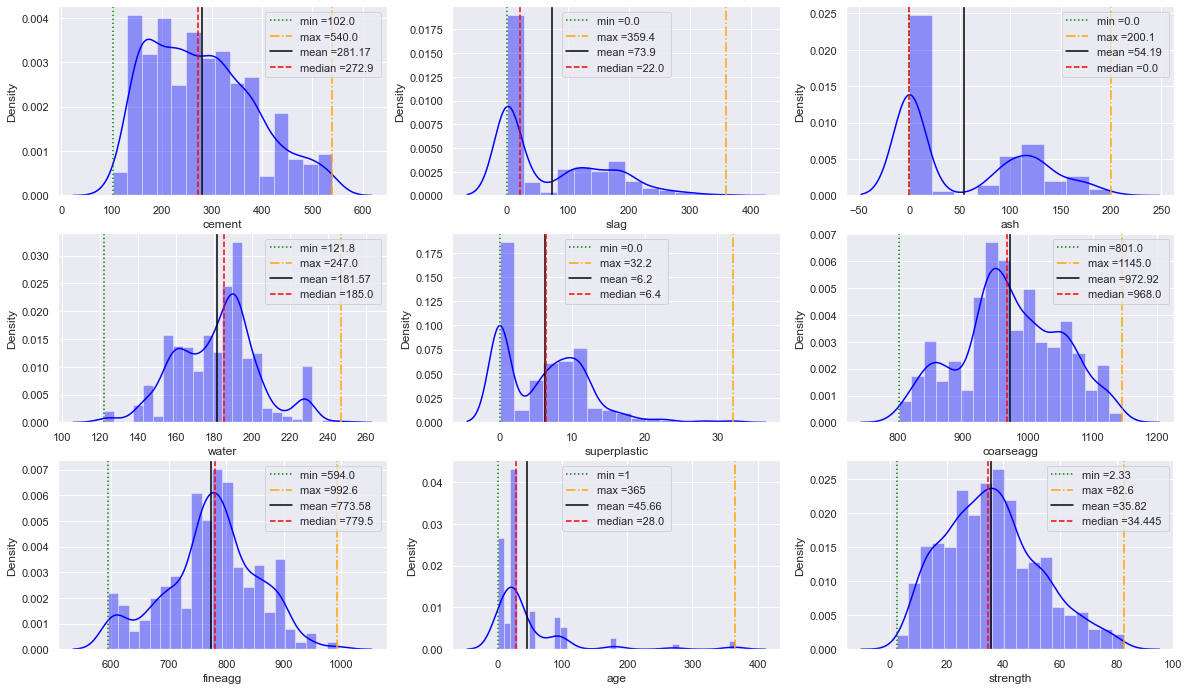

In [20]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in concrete_df.columns:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(concrete_df[i], color='blue')
    plt.axvline(concrete_df[i].min(),linestyle=":",label="min ={} ".format(round(concrete_df[i].min(),2)), color='green')
    plt.axvline(concrete_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(concrete_df[i].max(),2)), color='orange')
    plt.axvline(concrete_df[i].mean(),linestyle="-",label="mean ={} ".format(round(concrete_df[i].mean(),2)), color='black')
    plt.axvline(concrete_df[i].median(),linestyle="--",label="median ={} ".format(concrete_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1


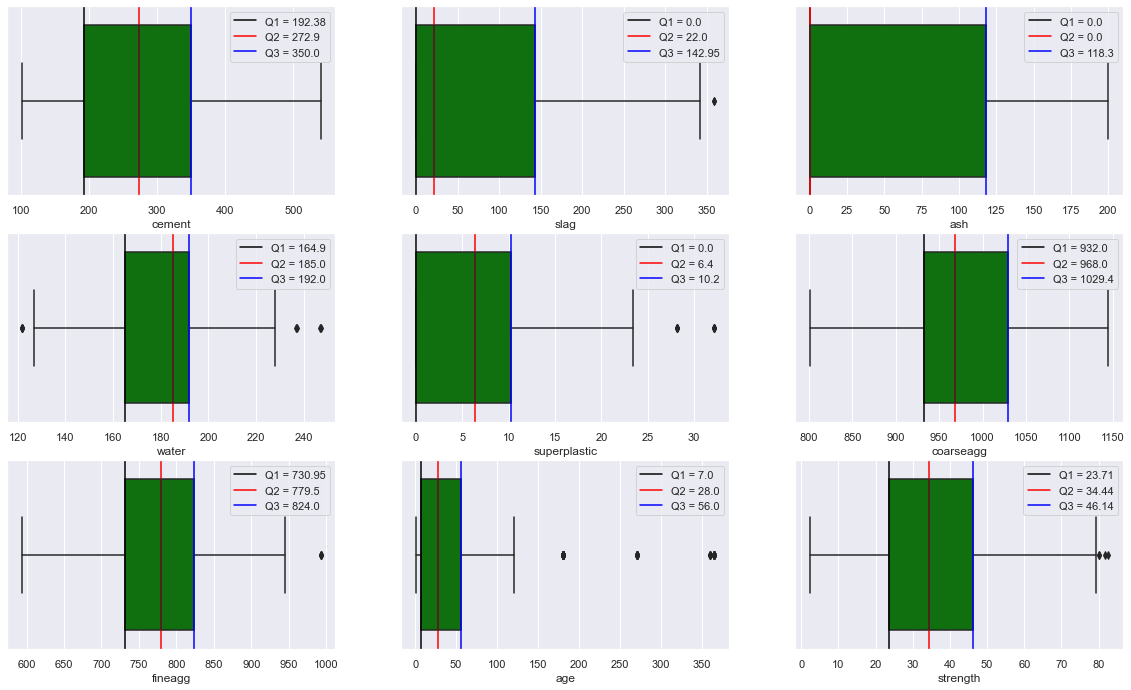

In [21]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in concrete_df.columns:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_df[i], color='green')
    plt.axvline(concrete_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

## INFERENCE 

#### Step 1:  Exploratory Data Quality Report Reflecting the Following:  

    - Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)
    - Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)
    - Using various plots, write the insights/observations about it. (6 Marks)

### PREDICTOR VARIABLES ANALYSIS: All predictors are numeric variables.

#### 1. Feature 'cement'
    - cement quantity in the mixture
    -  From the distribution plot, the majority of distribution is between 150-350 (with mean ~282 and median 273) and there is a slight skewness towards right. The distribution is skews a bit towards right though it appears to be normally ditributed.
    - The dist plot is slightly skewed towards right - mean>meadian - proves that. And skewness value is also +ve (0.50)
    - The standard deviation is 104.5 and the range is 438. With the std dev of 104.5, we can infer that the data is dispersed from mean but with the plot we can see the distribution has a right skewness though it appears to be normally ditributed.
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are NO outliers.
    
#### 2. Feature 'slag'
    - slag component in the mixture
    - From the distribution plot, we see there are 2 Gaussians (Bimodal) and skewed
    - Mean is 74 and Median 22. Skewness towards right. 
    - 50% of the concentration of the data is < 22 and the rest 50% widely spread from 22 to the max value ~360 
    - The dist plot is  skewed towards right - mean>meadian - proves that. And skewness value is also +ve (0.80)
    - The standard deviation is ~86 and the range is ~360. With the std dev of 86, we can infer that the data is dispersed from mean with the plot we can see the distribution has a right skewness 
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there is one outlier. We don't need to treat it. But, we will keep it open for later stage.     

#### 3. Feature 'ash'
    - ash component in the mixture
    - From the distribution plot, we see there are 2 Gaussians (Bimodal)
    - Mean is 54 and Median 0. Skewness towards right. 
    - 50% of the concentration of the data is <= 0 and the rest 50% widely spread from 0 to the max value ~200 
    - The dist plot is  skewed towards right - mean>meadian - proves that. And skewness value is also +ve (0.54)
    - The standard deviation is ~64 and the range is ~200. With the std dev of 64, we can infer that the data is dispersed from mean with the plot we can see the distribution has a right skewness 
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are NO Outliers.
    
#### 4. Feature 'water'
    - water added to cement to form concrete
    - From the distribution plot, we see this has some level of normal distribution.
    - Mean is ~182 and Median 185. Slight Skewness towards left. 
    - The dist plot is  a bit skewed towards left - mean<meadian - proves that. 
    - The standard deviation is ~21 and the range is ~125. With the std dev of 21, we can infer that the data is dispersed from mean with the plot we can see the distribution has a very slight left skewness 
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are few outliers both above upper and below whisker though the count is less. (4 and 1 rows). Considering low count, we don't need to treat it. But, we will keep it open for later stage.     
   
    
#### 5. Feature 'superplastic'
    - superplastic component to form concrete
    - From the distribution plot, we see this has some level of normal distribution, but there are 2 Gaussians.
    - Mean is ~6.2 and Median 6.4. Very slight Skewness towards left. 
    - The dist plot is  a bit skewed towards right. Skewness is 0.9.
    - The standard deviation is ~6 and the range is ~32. With the std dev of 6, we can infer that the data is closer to  mean and with the plot we can see the distribution has a very slight right skewness 
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are outliers. No. of outliers is 10. We can plan for imputing it.
    

#### 6. Feature 'coarseagg'
    - coarseagg component to form concrete
    - From the distribution plot, we see this has some level of normal distribution.
    - Mean is ~973 and Median 968. Very slight Skewness towards right. 
    - The dist plot is  a bit skewed towards left. Skewness is -0.04.
    - The standard deviation is ~78 and the range is ~344. With the std dev of ~78, we can infer that the data is spread from  mean and with the plot we can see the distribution has a very slight left skewness but more or less normal.
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are NO outliers.
    
#### 7. Feature 'fineagg'
    - fineagg component to form concrete
    - From the distribution plot, we see this has some level of normal distribution.
    - Mean is ~774 and Median 780. Very slight Skewness towards right. 
    - The dist plot is  a bit skewed towards left. Skewness is -0.25.
    - The standard deviation is ~80 and the range is ~399. With the std dev of ~80, we can infer that the data is spread from  mean and with the plot we can see the distribution has a very slight left skewness but more or less normal.
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are 5 outliers. Considering low count, we don't need to treat it. But, we will keep it open for later stage.     
    
#### 8. Feature 'age'
    - age of the mixture
    - From the distribution plot, we see this has some quite a bit skewness towards right.
    - Mean is ~46 and Median 28. Skewness towards right. 
    - The dist plot is skewed towards right. Skewness is 3.27.
    - The standard deviation is ~63 and the range is ~364. With the std dev of ~63, we can infer that the data is spread from  mean and with the plot we can see the distribution has right skewness
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are 59 outliers. We should impute this column.
    - Also, this column is discrete and the 1030 values are spread across 14 distinct values. We can plan to bin this column.
    
### RESPONSE VARIABLE (TARGET) ANALYSIS:

#### 9. 'strength'
    - The strength of the concrete
    - From the distribution plot, we see this has almost normal distribution.
    - Mean is ~36 and Median ~34.5. slight Skewness towards right. 
    - The dist plot is slightly skewed towards right. Skewness is ~0.42.
    - The standard deviation is ~17 and the range is ~80. With the std dev of ~17, we can infer that the data is spread from  mean and with the plot we can see the distribution has a slight right skewness
    - There are no NULL or missing values or negative values for this feature
    - From the 5 number summary and the boxplot, we see that there are 4 outliers.

#### One important observation is that all the predictors might need scaling though they have same units of measure (except for age); but the values are at different scales. We can plan for either MaxMin or Scaler.

#### We do see 0 Values in slag, ash, superplastic columns. And their counts are pretty high. Slag has 471 rows with 0 values, ash 566 rows and superplastic with 379 rows. With so many values, clearly these might not be incorrect depiction rather property of the cement mixture. So, we don't need to impute. But, we will monitor these columns for any skewness and transforming / standardizing before model building. And also when we do Bi-variate analysis we will see the co-relation with the Target and also amongst other predictors.

    
##### We do see there are 25 rows that are getting duplicated based on functions used above. They can be a dropped. But, I will keep this check at a later point as 25 rows constitute ~ 4% of already small dataset.

#### ACTION ITEMS during Feature Engineering:
    - standardization
    - Outlier imputation for columns like age, superplastic. Possibly for fineagg, water.
    - Duplicate removal - if needed
    - Binning of age column
    - Monitor the 0 valued columns impact to target and co-relation.

### Step 2: Bi-variate analysis between the predictor variables and also between the predictor variables and target column. 
    - Comment on your findings in terms of their relationship and degree of relation if any. 
    - Visualize the analysis using boxplots and pair plots, histograms, or density curves and 
    - write the insights/business understanding of the same. (8 marks) 

In [22]:
conc_corr=concrete_df.corr()

### Correlation Matrix

In [23]:
conc_corr

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

### Heat Map for the correlation

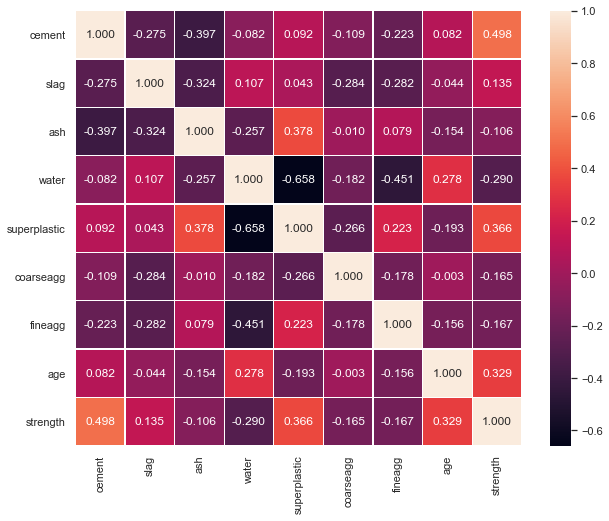

In [24]:
plt.figure(figsize= (10,8))
sns.heatmap(conc_corr,annot=True,cbar=True,linewidths=.2, fmt=".3f")
plt.show()

### Pairplot

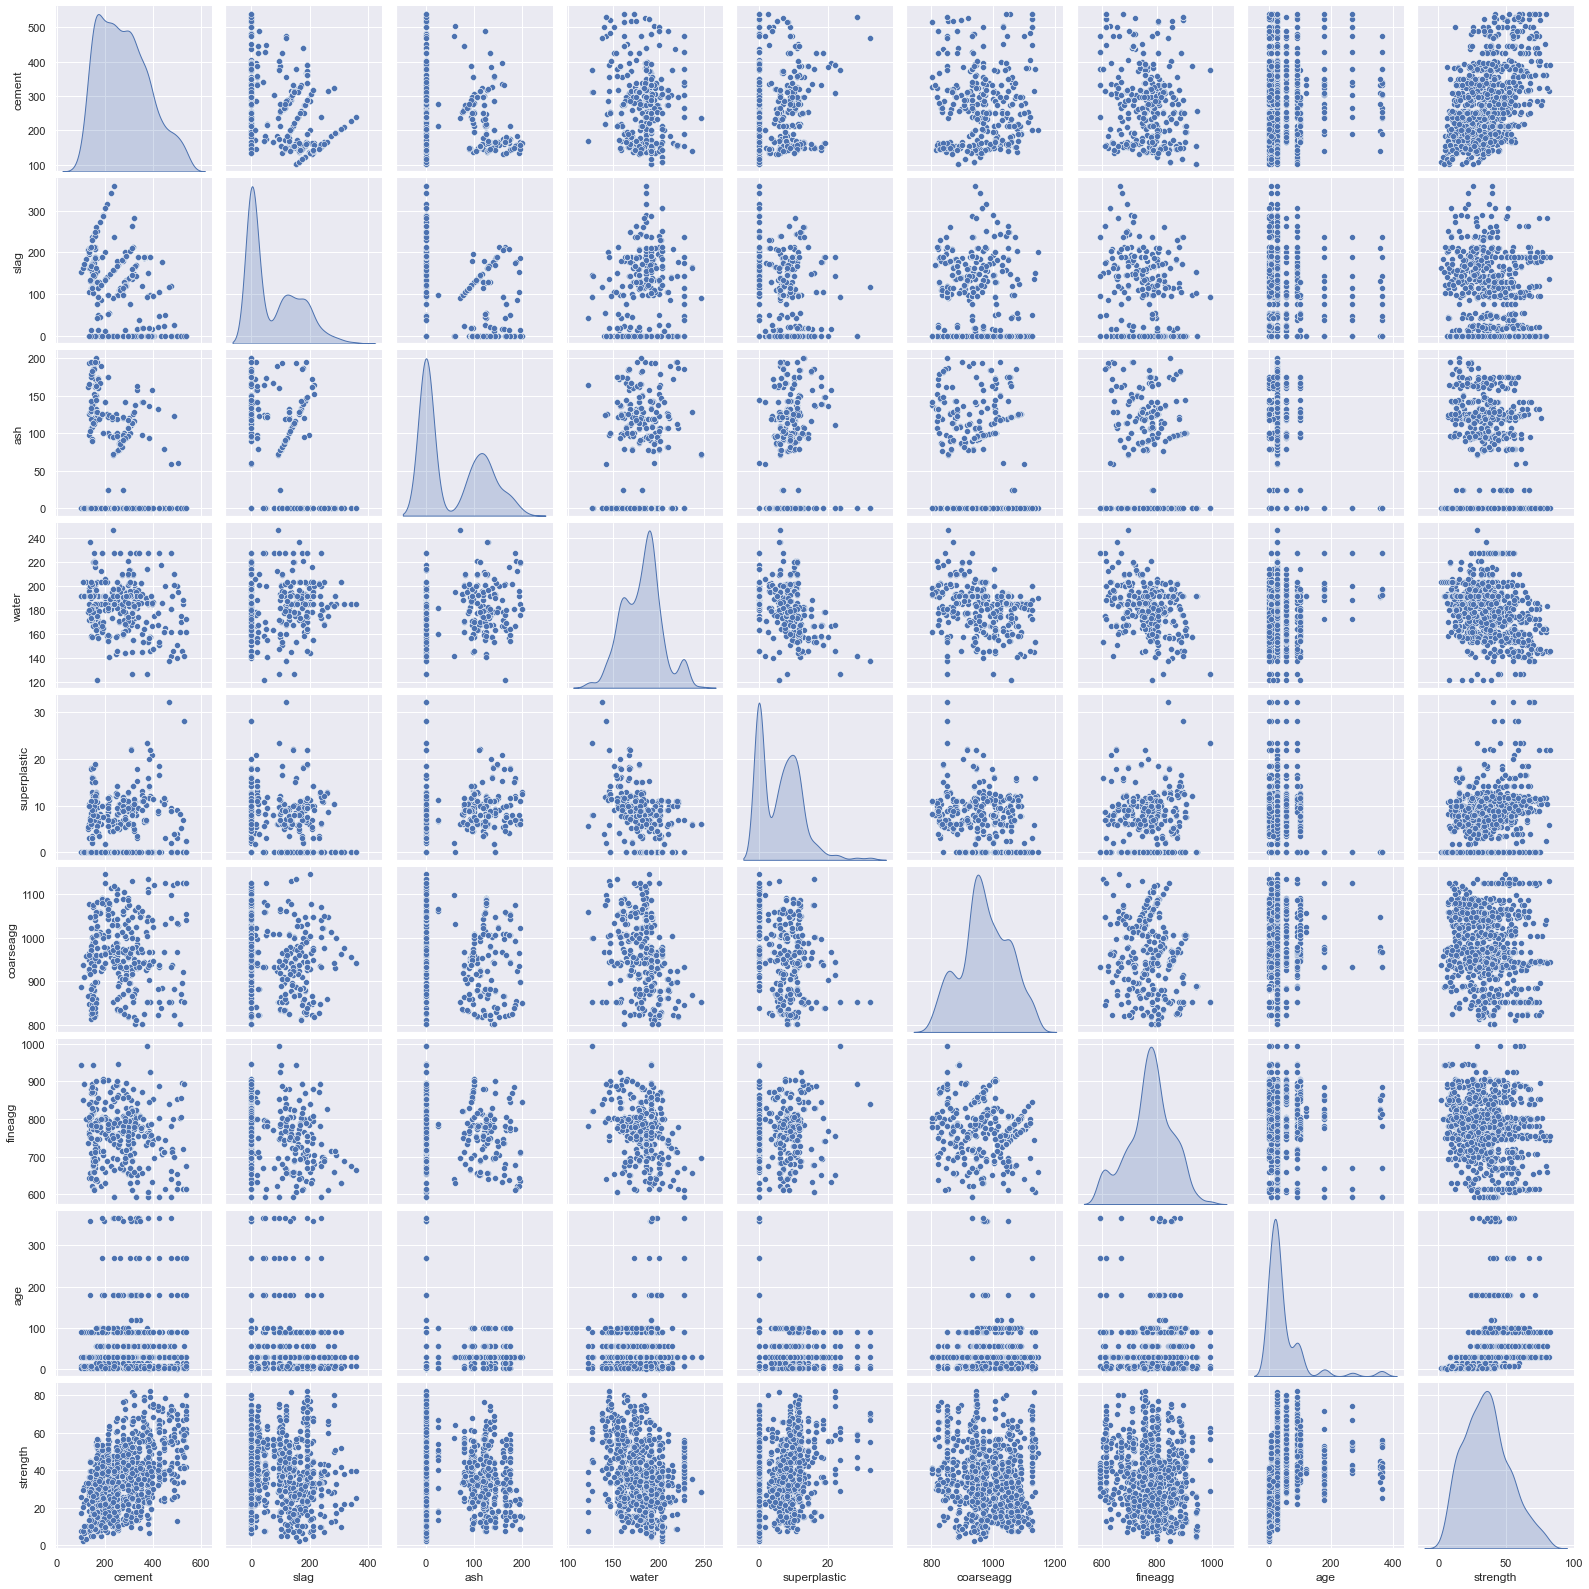

In [25]:
sns.pairplot(concrete_df, diag_kind='kde')

In [26]:
cols=concrete_df.columns
features= [x for x in cols if x != 'strength']
features

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

REG PLOT for 'cement'


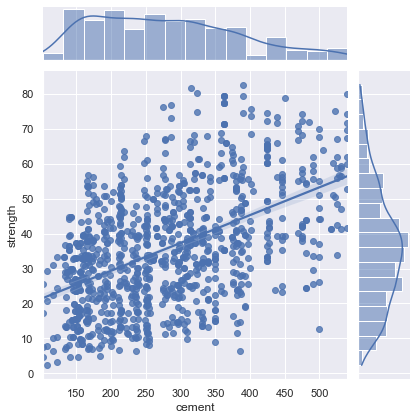


REG PLOT for 'slag'


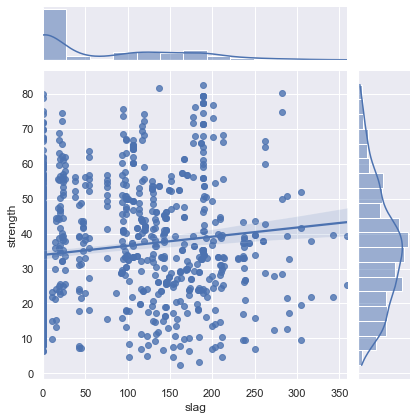


REG PLOT for 'ash'


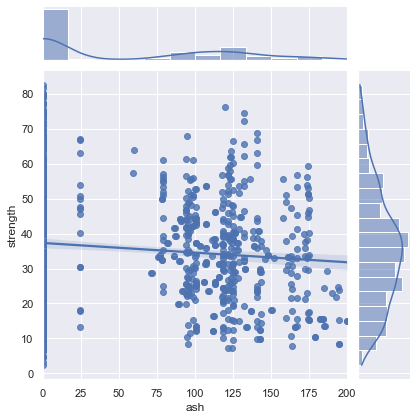


REG PLOT for 'water'


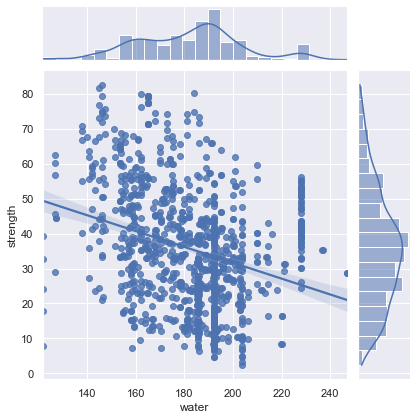


REG PLOT for 'superplastic'


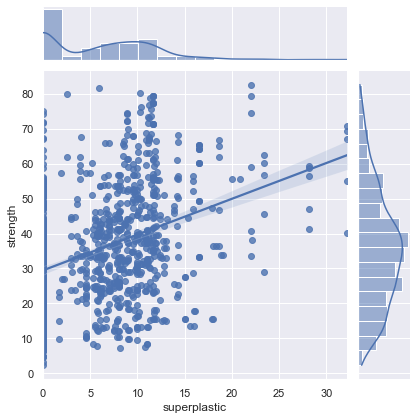


REG PLOT for 'coarseagg'


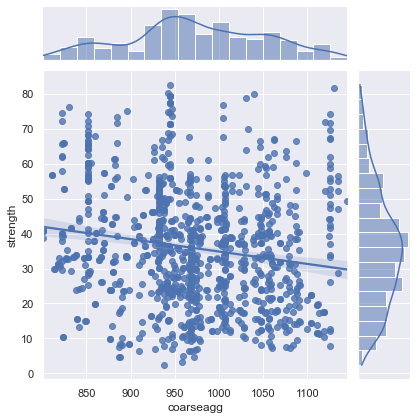


REG PLOT for 'fineagg'


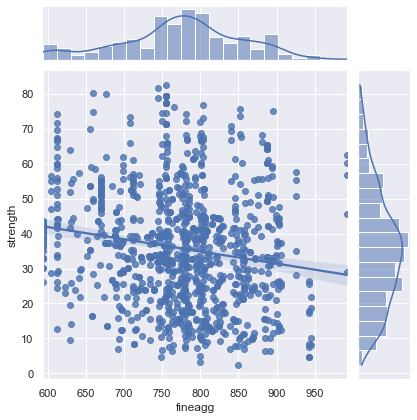


REG PLOT for 'age'


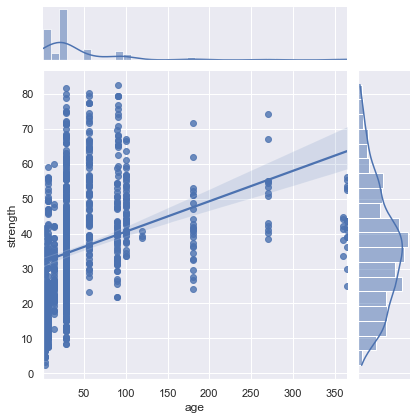

In [27]:
# I have used Joint plot with the numerical feature with the target variable and 
# also used reg variable to get the a simplistic linear regression fit.
for feature in features:
    sns.jointplot(concrete_df[feature], concrete_df['strength'], kind='reg')
    print("REG PLOT for '{0}'".format(feature))
    plt.show()
    print()

JOINT PLOT for 'cement'


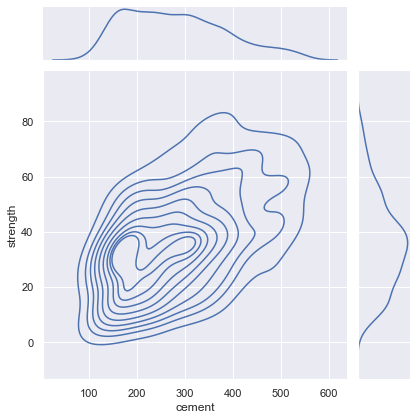


JOINT PLOT for 'slag'


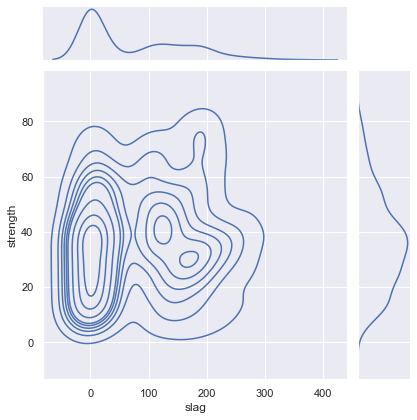


JOINT PLOT for 'ash'


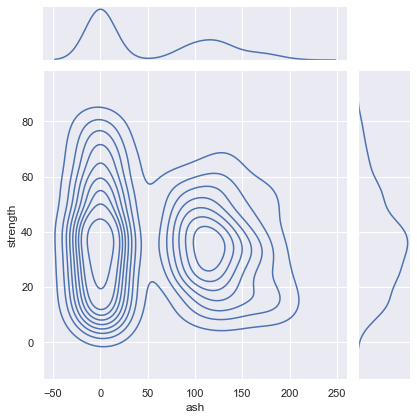


JOINT PLOT for 'water'


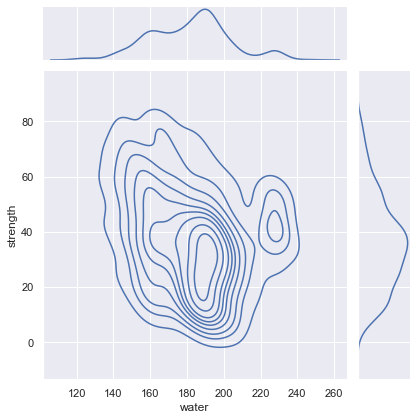


JOINT PLOT for 'superplastic'


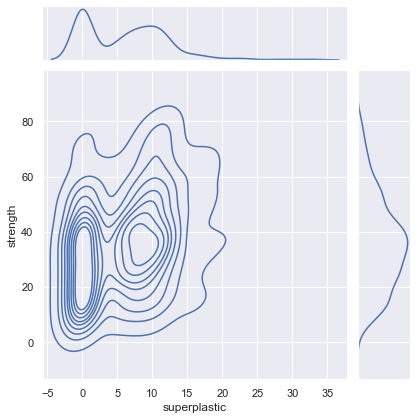


JOINT PLOT for 'coarseagg'


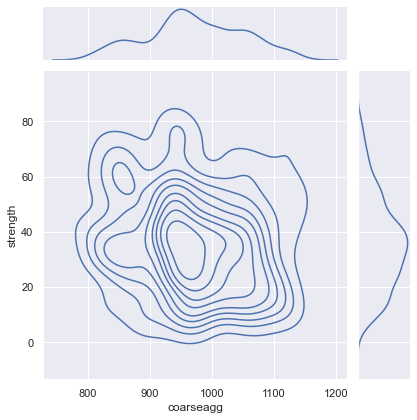


JOINT PLOT for 'fineagg'


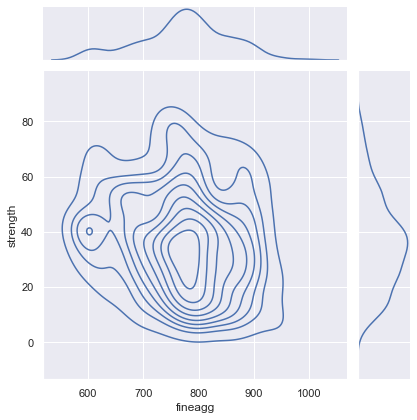


JOINT PLOT for 'age'


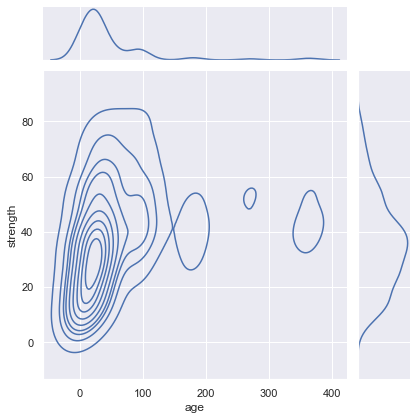

In [28]:
# I have used Joint plot with the numerical feature with the target variable and 
# also used kde variable to get the density curve on the univariate graphs and also for the bivariate in the main plot

for feature in features:
    concrete_df[feature]
    sns.jointplot(concrete_df[feature], concrete_df['strength'], kind='kde')
    print("JOINT PLOT for '{0}'".format(feature))
    plt.show()
    print()


## INFERENCE from above Correlation matrix, Heatmap, off-diagonal pair-plots, and density and linear reg plots

### Observations between Predictors and the Response variable

- Cement and Strength have a strong positive linear relationship (+0.5) though we see some kind of heteroscedasticity in the pairplot grid. 
- Slag and Strength seems to have very minimal linear correlation with a cloud like scatterplot. The correlation score is also low of ~ + 0.14
- Likewise, Ash and Strength seems to have very minimal linear correlation with a cloud like scatterplot. The correlation score is also low of ~ -0.106
- Water seems to have a good negative relationship with strength. The corr score is ~-0.30
- Superplastic appears to have a  positive relationship with strength going by the pairplot grid. The corr score is ~+0.36
- Coarseagg and Fineagg seems to have very minimal linear correlation with a cloud like scatterplot. The corr is also ~-0.17 for both.
- Age also has a positive correlation with the strength though the strength seems to peak for age around 30-50. The corr score os ~+0.33
- The weak variables like ash, slag, coarseagg, fineagg can be dropped and check for their effect. This will be a possible candidate in FEATURE engineering.

### Observations between Predictors

- cement has:
 - quite a negative correlation with both slag and ash
 - irrelevant or near 0 linear correlation with water, superplastic, age
 - slight negative correlation with fineagg, coarseagg

- slag has:
 - a negative correlation with cement, coarseagg, fineagg, ash
 - irrelevant or near 0 linear correlation with superplastic, age
 - slight positive correlation with water

- ash has:
 - a negative correlation with cement, slag, water
 - irrelevant or near 0 linear correlation with coarseagg and fineagg
 - slight negative correlation with age
 - good positive correlation with superplastic
 
- water has:
 - a negative correlation with ash,  coarseagg
 - very strong negative correlation with superplastic, fineagg
 - irrelevant or near 0 linear correlation with cement
 - positive correlation with slag, age
 
- superplastic has:
 - a very strong negative correlation with water, 
 - negative correlation with age, coarseagg
 - irrelevant or near 0 linear correlation with slag, cement
 - good positive correlation with ash, fineagg
 
- coarseagg has:
 - negative correlation with slag, cement, superplastic, fineagg, water
 - irrelevant or near 0 linear correlation with ash, age

- fineagg has:
 - negative correlation with slag, cement, coarseagg, age
 - strong negative correlation with water
 - good positive correlation with superplastic
 - irrelevant or near 0 linear correlation with ash

- age has:
 - negative correlation with ash , superplastic, fineagg 
 - positive correlation with water
 - irrelevant or near 0 linear correlation with cement, slag, coarseagg
 
##### The business understanding from these can be made is that for a concrete with a good strength, the proportion of cement, superplastic should be high in the mixture and also the age of the mixture between 30-50 days will be a good indicator for strength. Water content should be taken into account of as this has negative influence for the strenght rightly so. Other mixture components like ash, coarseagg, fineagg have no considerable influence. Slag has a slight influence, but not that great.

### Step 3: Feature Engineering techniques

   - Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)
   - Get the data model ready and do a train test split.
   - Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)


#### From earlier steps we had : ACTION ITEMS during Feature Engineering:
    - standardization
    - Outlier imputation for columns like age, superplastic. Possibly for fineagg, water.
    - Duplicate removal - if needed
    - Binning of age column
    - Monitor the 0 valued columns impact to target and co-relation.
    -  The weak predictors like ash, slag, coarseagg, fineagg can be dropped check for their effect. This will be a possible candidate in FEATURE engineering.

### Feature Engineering & Pre-processing:

#### 1)  In terms of new feature to be extracted that will influence strength, what I am thinking is based on hint provided for area, if we can create a dataframe with cement to water ratio. As cement is proportional to strength and water inversely proportional..we can extract a column called cement-water-ratio. This can be used as part of an iteration while evaluating model.

#### 2)  For dropping of features, as from graph analysis, we see ash, coarseagg, fineagg, slag seems to provide very minimal impact esply ash, coarseagg, fineagg - we can drop them and check while doing model evaluation. We can also check the feature importance using Lasso CV when we do model

#### 3) Standardization is needed we can use minmax or standard scaler. We will use one of them as part of pipeline.

#### 4) As duplicates are about 4% of the total data, I will keep the dataset as-is

#### 5) Outlier need to be address for age, superplastic. Fineagg and water have minimal - so will avoid. Outlier strategy, can be mean. But, we will check the distribution before and after. We will address outliers before evaluating model

#### 6) We see that there are only 14 distinct age values. We can possibly bin these and check & evaluate model.

### So from above, my plan is to iterate multiple times during model evaluation viz.,
- Iteration 0: Use existing dataset with no changes and evaluate models
- Iteration A: Use existing Dataset with Outlier treatment and evaluate models 
- Iteration B: Use existing Dataset with Outlier treatment and bin the AGE column and evaluate models
- Iteration C: Use extracted feature Dataset (with cement-water-ratio) with Outlier treatment and evaluate models
- Iteration D: Use existing dataset with outlier treatment but drop columns as stated above and evaluate models
- Iteration D-1(optional): Depending on the extracted feature performance, we can drop column for this and evaluate models


## CREATING A NEW DATAFRAME WITH OUTLIERS TREATED

In [29]:
## concrete_df is original dataset
## concrete_outlier_df is dataset with outlier treatment

concrete_outlier_df=concrete_df.copy()
print(concrete_outlier_df.shape)

## we decided to impute superplastic and age 
print("BEFORE IMPUTING SUPERPLASTIC")
print("Quartiles are \n{0}".format(concrete_outlier_df['superplastic'].quantile([0.25, 0.5, 0.75])))
IQR1=concrete_outlier_df['superplastic'].quantile(0.75)-concrete_outlier_df['superplastic'].quantile(0.25)
print("IQR1 is {0}".format(IQR1))
print('Max is {0}'.format(concrete_outlier_df['superplastic'].max()))
upper_whskr1=concrete_outlier_df['superplastic'].quantile(0.75)+IQR1*1.5
lower_whskr1=concrete_outlier_df['superplastic'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr1))
print("Lower Whisker is {0}".format(lower_whskr1))
print('Min is {0}'.format(concrete_outlier_df['superplastic'].min()))
print("Std is {0}".format(concrete_outlier_df['superplastic'].std()))
print('Count of - outliers superplastic {}'.format(
    concrete_outlier_df[(concrete_outlier_df['superplastic']>upper_whskr1)| (concrete_outlier_df['superplastic']<lower_whskr1) ]['superplastic'].value_counts().sum()))
print('\nRecords of Outliers\n',concrete_outlier_df[(concrete_outlier_df['superplastic']>upper_whskr1)| (concrete_outlier_df['superplastic']<lower_whskr1) ]['superplastic'])

(1030, 9)
BEFORE IMPUTING SUPERPLASTIC
Quartiles are 
0.25     0.0
0.50     6.4
0.75    10.2
Name: superplastic, dtype: float64
IQR1 is 10.2
Max is 32.2
Upper Whisker is 25.5
Lower Whisker is -15.299999999999999
Min is 0.0
Std is 5.973841392485508
Count of - outliers superplastic 10

Records of Outliers
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


DISTRIBUTION BEFORE 
+++++++++++++++++++++++++++++++


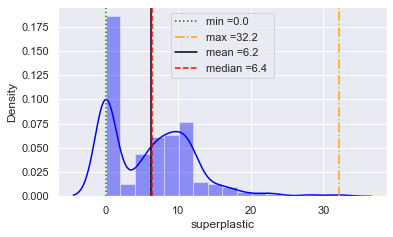

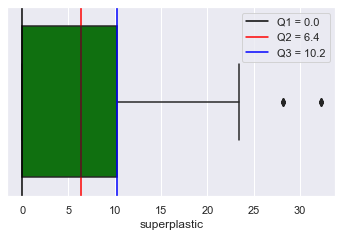

In [30]:
print("DISTRIBUTION BEFORE ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['superplastic']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(concrete_outlier_df[i], color='blue')
    plt.axvline(concrete_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(concrete_outlier_df[i].min(),2)), color='green')
    plt.axvline(concrete_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(concrete_outlier_df[i].max(),2)), color='orange')
    plt.axvline(concrete_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(concrete_outlier_df[i].mean(),2)), color='black')
    plt.axvline(concrete_outlier_df[i].median(),linestyle="--",label="median ={} ".format(concrete_outlier_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['superplastic']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_outlier_df[i], color='green')
    plt.axvline(concrete_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [31]:
print('ACTUAL IMPUTING by MEDIAN value for rows that has values greater than upperwhisker and lower than lower whisker based on 5 point summary\n')
concrete_outlier_df.loc[(concrete_outlier_df['superplastic']>upper_whskr1)|(concrete_outlier_df['superplastic']<lower_whskr1), 'superplastic']=concrete_outlier_df['superplastic'].quantile(0.5)


ACTUAL IMPUTING by MEDIAN value for rows that has values greater than upperwhisker and lower than lower whisker based on 5 point summary



In [32]:
print("AFTER IMPUTING SUPERPLASTIC")
print("Quartiles are \n{0}".format(concrete_outlier_df['superplastic'].quantile([0.25, 0.5, 0.75])))
IQR2=concrete_outlier_df['superplastic'].quantile(0.75)-concrete_outlier_df['superplastic'].quantile(0.25)
print("IQR2 is {0}".format(IQR2))
print('Max is {0}'.format(concrete_outlier_df['superplastic'].max()))
upper_whskr2=concrete_outlier_df['superplastic'].quantile(0.75)+IQR1*1.5
lower_whskr2=concrete_outlier_df['superplastic'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr2))
print("Lower Whisker is {0}".format(lower_whskr2))
print('Min is {0}'.format(concrete_outlier_df['superplastic'].min()))
print("Std is {0}".format(concrete_outlier_df['superplastic'].std()))
print('Count of - outliers superplastic {}'.format(
    concrete_outlier_df[(concrete_outlier_df['superplastic']>upper_whskr2)| (concrete_outlier_df['superplastic']<lower_whskr2) ]['superplastic'].value_counts().sum()))
print('\nRecords of Outliers\n',concrete_outlier_df[(concrete_outlier_df['superplastic']>upper_whskr2)| (concrete_outlier_df['superplastic']<lower_whskr2) ]['superplastic'])

AFTER IMPUTING SUPERPLASTIC
Quartiles are 
0.25     0.000
0.50     6.400
0.75    10.075
Name: superplastic, dtype: float64
IQR2 is 10.075
Max is 23.4
Upper Whisker is 25.375
Lower Whisker is -15.299999999999999
Min is 0.0
Std is 5.47716540053504
Count of - outliers superplastic 0

Records of Outliers
 Series([], Name: superplastic, dtype: float64)


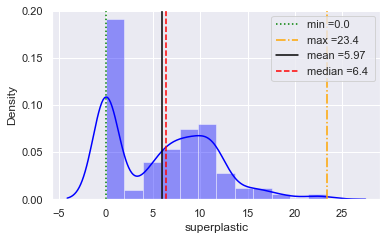

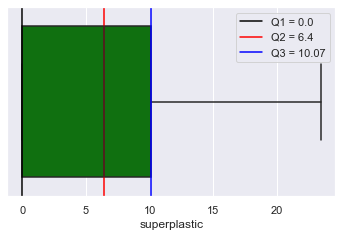

In [33]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['superplastic']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(concrete_outlier_df[i], color='blue')
    plt.axvline(concrete_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(concrete_outlier_df[i].min(),2)), color='green')
    plt.axvline(concrete_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(concrete_outlier_df[i].max(),2)), color='orange')
    plt.axvline(concrete_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(concrete_outlier_df[i].mean(),2)), color='black')
    plt.axvline(concrete_outlier_df[i].median(),linestyle="--",label="median ={} ".format(concrete_outlier_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['superplastic']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_outlier_df[i], color='green')
    plt.axvline(concrete_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [34]:
print("BEFORE IMPUTING AGE")
print("Quartiles are \n{0}".format(concrete_outlier_df['age'].quantile([0.25, 0.5, 0.75])))
IQR1=concrete_outlier_df['age'].quantile(0.75)-concrete_outlier_df['age'].quantile(0.25)
print("IQR1 is {0}".format(IQR1))
print('Max is {0}'.format(concrete_outlier_df['age'].max()))
upper_whskr1=concrete_outlier_df['age'].quantile(0.75)+IQR1*1.5
lower_whskr1=concrete_outlier_df['age'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr1))
print("Lower Whisker is {0}".format(lower_whskr1))
print('Min is {0}'.format(concrete_outlier_df['age'].min()))
print("Std is {0}".format(concrete_outlier_df['age'].std()))
print('Count of - outliers age {}'.format(
    concrete_outlier_df[(concrete_outlier_df['age']>upper_whskr1)| (concrete_outlier_df['age']<lower_whskr1) ]['age'].value_counts().sum()))
print('\nRecords of Outliers\n',concrete_outlier_df[(concrete_outlier_df['age']>upper_whskr1)| (concrete_outlier_df['age']<lower_whskr1) ]['age'])

BEFORE IMPUTING AGE
Quartiles are 
0.25     7.0
0.50    28.0
0.75    56.0
Name: age, dtype: float64
IQR1 is 49.0
Max is 365
Upper Whisker is 129.5
Lower Whisker is -66.5
Min is 1
Std is 63.16991158103279
Count of - outliers age 59

Records of Outliers
 51      180
64      365
93      180
99      180
103     180
133     365
144     180
149     270
152     180
157     360
159     365
198     365
199     180
207     180
256     270
262     270
270     270
297     270
302     180
312     180
313     270
323     360
359     180
361     360
370     180
393     365
448     360
465     365
484     365
539     180
570     270
581     180
594     180
601     365
620     180
622     180
623     270
632     270
642     180
696     180
713     365
720     365
721     180
754     365
755     360
776     180
850     270
861     180
878     270
900     180
901     365
919     360
951     270
957     365
971     180
985     180
995     365
1017    180
1028    270
Name: age, dtype: int64


DISTRIBUTION BEFORE 
+++++++++++++++++++++++++++++++


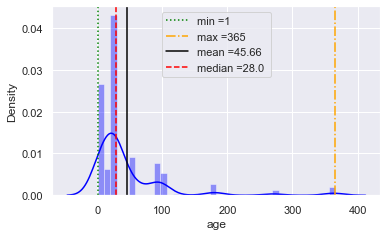

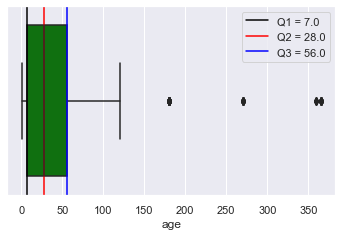

In [35]:
print("DISTRIBUTION BEFORE ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['age']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(concrete_outlier_df[i], color='blue')
    plt.axvline(concrete_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(concrete_outlier_df[i].min(),2)), color='green')
    plt.axvline(concrete_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(concrete_outlier_df[i].max(),2)), color='orange')
    plt.axvline(concrete_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(concrete_outlier_df[i].mean(),2)), color='black')
    plt.axvline(concrete_outlier_df[i].median(),linestyle="--",label="median ={} ".format(concrete_outlier_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['age']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_outlier_df[i], color='green')
    plt.axvline(concrete_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [36]:
print('ACTUAL IMPUTING by MEAN value for rows that has values greater than upperwhisker or lesser than lower whisjer based on 5 point summary\n')
concrete_outlier_df.loc[(concrete_outlier_df['age']>upper_whskr1)|(concrete_outlier_df['age']<lower_whskr1), 'age']=concrete_outlier_df['age'].mean()


ACTUAL IMPUTING by MEAN value for rows that has values greater than upperwhisker or lesser than lower whisjer based on 5 point summary



In [37]:
print("AFTER IMPUTING AGE")
print("Quartiles are \n{0}".format(concrete_outlier_df['age'].quantile([0.25, 0.5, 0.75])))
IQR2=concrete_outlier_df['age'].quantile(0.75)-concrete_outlier_df['age'].quantile(0.25)
print("IQR2 is {0}".format(IQR2))
print('Max is {0}'.format(concrete_outlier_df['age'].max()))
upper_whskr2=concrete_outlier_df['age'].quantile(0.75)+IQR1*1.5
lower_whskr2=concrete_outlier_df['age'].quantile(0.25)-IQR1*1.5
print("Upper Whisker is {0}".format(upper_whskr2))
print("Lower Whisker is {0}".format(lower_whskr2))
print('Min is {0}'.format(concrete_outlier_df['age'].min()))
print("Std is {0}".format(concrete_outlier_df['age'].std()))
print('Count of - outliers age {}'.format(
    concrete_outlier_df[(concrete_outlier_df['age']>upper_whskr2)| (concrete_outlier_df['age']<lower_whskr2) ]['age'].value_counts().sum()))
print('\nRecords of Outliers\n',concrete_outlier_df[(concrete_outlier_df['age']>upper_whskr2)| (concrete_outlier_df['age']<lower_whskr2) ]['age'])

AFTER IMPUTING AGE
Quartiles are 
0.25     7.000000
0.50    28.000000
0.75    45.662136
Name: age, dtype: float64
IQR2 is 38.662135922330094
Max is 120.0
Upper Whisker is 119.1621359223301
Lower Whisker is -66.5
Min is 1.0
Std is 27.951513948016434
Count of - outliers age 3

Records of Outliers
 272    120.0
434    120.0
862    120.0
Name: age, dtype: float64


DISTRIBUTION after 
+++++++++++++++++++++++++++++++


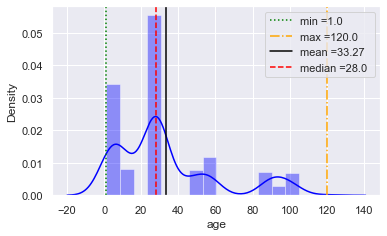

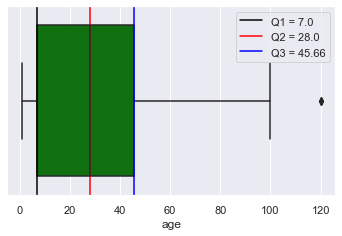

In [38]:
print("DISTRIBUTION after ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['age']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(concrete_outlier_df[i], color='blue')
    plt.axvline(concrete_outlier_df[i].min(),linestyle=":",label="min ={} ".format(round(concrete_outlier_df[i].min(),2)), color='green')
    plt.axvline(concrete_outlier_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(concrete_outlier_df[i].max(),2)), color='orange')
    plt.axvline(concrete_outlier_df[i].mean(),linestyle="-",label="mean ={} ".format(round(concrete_outlier_df[i].mean(),2)), color='black')
    plt.axvline(concrete_outlier_df[i].median(),linestyle="--",label="median ={} ".format(concrete_outlier_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['age']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_outlier_df[i], color='green')
    plt.axvline(concrete_outlier_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_outlier_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_outlier_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_outlier_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_outlier_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_outlier_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

### Outlier treatment for superplastic and age
#### A. I used median for treating superplastic as it made the # of outliers to 0
#### B. Whereas, I used mean for treating age even though the # of outliers reduced from 59 to 3, the outlier value is very close to upper whisker. When I treated with median, the outliers were still 3, bu the outlier values were much further away from upper whisker.

In [39]:
# Original Dataset
print(concrete_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(concrete_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", concrete_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", concrete_df.isna().values.any())

(1030, 9)
NULL CHECK 

***************************************
              0
cement        0
slag          0
ash           0
water         0
superplastic  0
coarseagg     0
fineagg       0
age           0
strength      0


Null Values anywhere :  False


In [40]:
#outlier treated dataset
print(concrete_outlier_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(concrete_outlier_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", concrete_outlier_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", concrete_df.isna().values.any())

(1030, 9)
NULL CHECK 

***************************************
              0
cement        0
slag          0
ash           0
water         0
superplastic  0
coarseagg     0
fineagg       0
age           0
strength      0


Null Values anywhere :  False


## CREATING A NEW DATAFRAME WITH NEW FEATURE EXTRACTED

In [41]:
## Creating new column as a cement to water ratio.
concrete_new_df=concrete_df.copy()
print(concrete_new_df.shape)

concrete_new_df['c/w ratio'] = round(concrete_new_df['cement'] / concrete_new_df['water'] * 100,2)

concrete_new_df

(1030, 9)


cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  c/w ratio  
0        29.89      69.43  
1        23.51     106.70  
2        29.22     133.40  
3        45.85     116.67  
4        18.29      80.08  
...        ...        ...  
1025     13.29      75.00  
1026     41.30     374.68  
1027     44.28     153.90  
1028     55.06     150.00  
1029     52.61     312.14  

[1030 rows x 10 columns]

In [42]:
for feature in ['c/w ratio']: # Loop through all columns in the dataframe
        print("Feature is {0}".format(feature))
        print("******************")
        print("Range is {0}".format(concrete_new_df[feature].max()-concrete_new_df[feature].min()))
        print("Mean is {0}".format(concrete_new_df[feature].mean()))
        print("Median is {0}".format(concrete_new_df[feature].median()))
        print("Skewness is {0}".format(concrete_new_df[feature].skew()))
        print("Std is {0}".format(concrete_new_df[feature].std()))
        print("Quartiles are \n{0}".format(concrete_new_df[feature].quantile([0.25, 0.5, 0.75])))
        IQR=concrete_new_df[feature].quantile(0.75)-concrete_new_df[feature].quantile(0.25)
        print("IQR is {0}".format(IQR))
        print('Max is {0}'.format(concrete_new_df[feature].max()))
        print("Upper Whisker is {0}".format(concrete_new_df[feature].quantile(0.75)+IQR*1.5))
        print("Lower Whisker is {0}".format(concrete_new_df[feature].quantile(0.25)-IQR*1.5))
        print('Min is {0}'.format(concrete_new_df[feature].min()))
        print("******************\n")

Feature is c/w ratio
******************
Range is 321.56
Mean is 157.82817475728143
Median is 148.075
Skewness is 0.8143224680249113
Std is 64.81037824491787
Quartiles are 
0.25    106.930
0.50    148.075
0.75    187.500
Name: c/w ratio, dtype: float64
IQR is 80.57
Max is 374.68
Upper Whisker is 308.355
Lower Whisker is -13.924999999999983
Min is 53.12
******************



In [43]:
print('Count of - outliers c/w ratio {}'.format(
    concrete_new_df[concrete_new_df['c/w ratio']>308.355]['c/w ratio'].value_counts().sum()))

Count of - outliers c/w ratio 27


DISTRIBUTION for C/W ratio 
+++++++++++++++++++++++++++++++


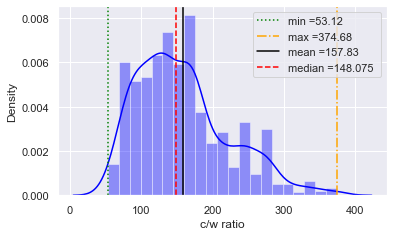

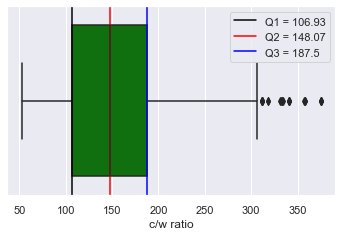

In [44]:
print("DISTRIBUTION for C/W ratio ")
print("+++++++++++++++++++++++++++++++")
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['c/w ratio']:
    plt.subplot(4, 3, pos)
    ax=sns.distplot(concrete_new_df[i], color='blue')
    plt.axvline(concrete_new_df[i].min(),linestyle=":",label="min ={} ".format(round(concrete_new_df[i].min(),2)), color='green')
    plt.axvline(concrete_new_df[i].max(),linestyle="dashdot",label="max ={} ".format(round(concrete_new_df[i].max(),2)), color='orange')
    plt.axvline(concrete_new_df[i].mean(),linestyle="-",label="mean ={} ".format(round(concrete_new_df[i].mean(),2)), color='black')
    plt.axvline(concrete_new_df[i].median(),linestyle="--",label="median ={} ".format(concrete_new_df[i].median()), color='red')
   # plt.axvline(concrete_df[i].mode()[0],linestyle=":",label="mode", color='green')
    plt.legend()
    pos+=1
    
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in ['c/w ratio']:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_new_df[i], color='green')
    plt.axvline(concrete_new_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_new_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_new_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_new_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_new_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_new_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

In [45]:
#new feature treated dataset
print(concrete_new_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(concrete_new_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", concrete_new_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", concrete_df.isna().values.any())

(1030, 10)
NULL CHECK 

***************************************
              0
cement        0
slag          0
ash           0
water         0
superplastic  0
coarseagg     0
fineagg       0
age           0
strength      0
c/w ratio     0


Null Values anywhere :  False


### Inference from above: When adding c/w ratio , we see there are outliers. We need to treat these outlier. We will use this as raw DF with extracted feature and evaluate models and then decide.

## DROPPING FEATURES AND CREATING A NEW DataFrame

### For dropping of features, as from graph analysis, we see ash, coarseagg, fineagg, slag seems to provide very minimal impact esply ash, coarseagg, fineagg - we can drop them and check while doing model evaluation. 

In [376]:
## Drop features
concrete_drop_df=concrete_df.copy()
print(concrete_drop_df.shape)

concrete_drop_df.drop(['ash', 'coarseagg', 'fineagg'], axis=1, inplace=True)
concrete_drop_df

(1030, 9)


cement   slag  water  superplastic  age  strength
0      141.3  212.0  203.5           0.0   28     29.89
1      168.9   42.2  158.3          10.8   14     23.51
2      250.0    0.0  187.4           5.5   28     29.22
3      266.0  114.0  228.0           0.0   28     45.85
4      154.8  183.4  193.3           9.1   28     18.29
...      ...    ...    ...           ...  ...       ...
1025   135.0    0.0  180.0          10.0   28     13.29
1026   531.3    0.0  141.8          28.2    3     41.30
1027   276.4  116.0  179.6           8.9   28     44.28
1028   342.0   38.0  228.0           0.0  270     55.06
1029   540.0    0.0  173.0           0.0    7     52.61

[1030 rows x 6 columns]

In [377]:
#dropped feature treated dataset
print(concrete_drop_df.shape)
print("NULL CHECK \n")
print("***************************************")
print(concrete_drop_df.isnull().sum().to_frame())
print("\n\nNull Values anywhere : ", concrete_drop_df.isnull().values.any())
#Inference : No Nulls
#print("\n\nNull Values anywhere : ", concrete_df.isna().values.any())

(1030, 6)
NULL CHECK 

***************************************
              0
cement        0
slag          0
water         0
superplastic  0
age           0
strength      0


Null Values anywhere :  False


In [378]:
# so we have 4 datasets
print('concrete_df is original', concrete_df.shape)
print('concrete_outlier_df is imputed for outliers',concrete_outlier_df.shape)
print('concrete_new_df is we new extracted feature', concrete_new_df.shape)
print('concrete_drop_df has 3 columns dropped', concrete_drop_df.shape)

concrete_df is original (1030, 9)
concrete_outlier_df is imputed for outliers (1030, 9)
concrete_new_df is we new extracted feature (1030, 10)
concrete_drop_df has 3 columns dropped (1030, 6)


## Get the data model ready and do a train test split.
#### Here we will create 4 sets of Train and Test sets from each of the dataframe derived and also using original dataframe.

In [49]:
# we will split the Target to a separate DF for the Original Dataset
X1 = concrete_df.drop('strength', axis=1)
y1 = concrete_df['strength']
# Train : Test :: 70:30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=1)

In [50]:
print(X1.shape, y1.shape, X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(1030, 8) (1030,) (721, 8) (721,) (309, 8) (309,)


In [51]:
# we will split the Target to a separate DF for the outlier treated dataset
X2 = concrete_outlier_df.drop('strength', axis=1)
y2 = concrete_outlier_df['strength']
# Train : Test :: 70:30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30,random_state=1)
print(X2.shape, y2.shape, X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(1030, 8) (1030,) (721, 8) (721,) (309, 8) (309,)


In [380]:
# we will split the Target to a separate DF for the new extracted dataset
X4 = concrete_new_df.drop('strength', axis=1)
y4 = concrete_new_df['strength']
# Train : Test :: 70:30
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30,random_state=1)
print(X4.shape, y4.shape, X4_train.shape, y4_train.shape, X4_test.shape, y4_test.shape)

(1030, 9) (1030,) (721, 9) (721,) (309, 9) (309,)


In [379]:
# we will split the Target to a separate DF for the dropped dataset
X3 = concrete_drop_df.drop('strength', axis=1)
y3 = concrete_drop_df['strength']
# Train : Test :: 70:30
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30,random_state=1)
print(X3.shape, y3.shape, X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape)


(1030, 5) (1030,) (721, 5) (721,) (309, 5) (309,)


### Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

In [54]:
# We will use the original dataset X1 y1 to check for the simplistic linear model first. Am not using any scaling at this moment
# this is just a dipstick fit
model1 = LinearRegression(fit_intercept=True)
model1.fit(X1_train, y1_train)

LinearRegression()

In [55]:
#get the R-square score the train, test data

print('The coefficient of determination R^2 of the regression on train', model1.score(X1_train, y1_train)*100)
print('The coefficient of determination R^2 of the regression on test', model1.score(X1_test, y1_test)*100)

print("\nTest Vs Pred Metrics")
print("**************************")
print("The Mean Absolute Error (MSE): ", mean_absolute_error(y1_test, model1.predict(X1_test))) #MAE describes the typical magnitude of the residuals.
print("The  Mean Square Error (MSE) : ", mean_squared_error(y1_test,model1.predict(X1_test)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,model1.predict(X1_test))))
print("The R2 score :", r2_score(y1_test, model1.predict(X1_test))*100)

The coefficient of determination R^2 of the regression on train 60.314875406302306
The coefficient of determination R^2 of the regression on test 63.39136715208276

Test Vs Pred Metrics
**************************
The Mean Absolute Error (MSE):  8.19919885042099
The  Mean Square Error (MSE) :  106.54560359850507
The Root Mean Square Error (RMSE) :  10.322092985364211
The R2 score : 63.39136715208276


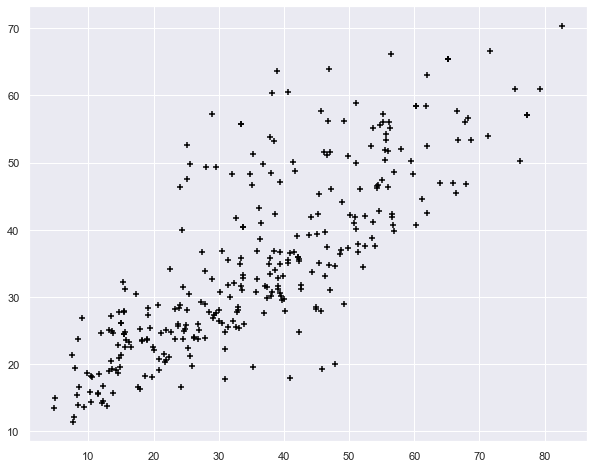

In [56]:
## Plot between
plt.figure(figsize=(10,8))
plt.scatter(y1_test,model1.predict(X1_test), marker='+', color='black')
plt.show()

In [57]:
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = model1.coef_
coeff_data['Feature'] = X1_train.columns
coeff_data = coeff_data.append({'Coefs': model1.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

Coefs       Feature
0   0.126558        cement
1   0.108828          slag
2   0.090705           ash
3  -0.103157         water
4   0.376123  superplastic
5   0.024029     coarseagg
6   0.036193       fineagg
7   0.110435           age
8 -52.963271     Intercept

In [58]:
cols=concrete_df.columns
features= [x for x in cols if x != 'strength']
features

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age']

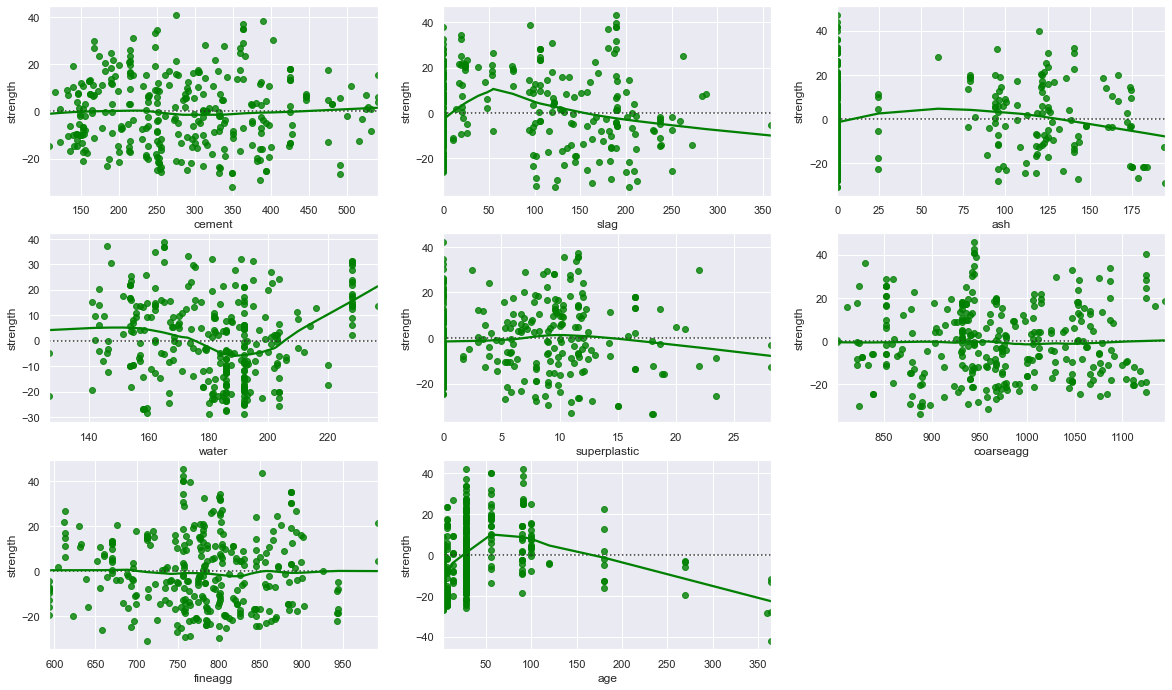

In [59]:
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in features:
    plt.subplot(4, 3, pos)
    ax=sns.residplot(x= X1_test[i], y= y1_test,data=concrete_df, color='green', lowess=True)
    pos+=1


### Inference : From the above ResidualPlots and mapping each of the test predictors with the response (strength) and looking at lowess - we can conclude that a polynomial function might be better. We can try using polynomial power of 2 or 3. 

In [62]:
import statsmodels.api as sm

X1 = sm.add_constant(X1)

linearmodel1 = sm.OLS(y1, X1).fit()

predictions = linearmodel1.predict(X1) 

print_model = linearmodel1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Fri, 22 Jan 2021   Prob (F-statistic):          6.29e-206
Time:                        08:32:07   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.3312     26.586     -0.878   

## Interpreting the Regression Results:(from lesson for understanding)

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.613**, needs improvement!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-23.33**
3. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
6. **P >|t|**: It is p-value.
   - A p-value of less than 0.05 is considered to be statistically significant.
7. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

### Step 4: Creating the Model and Tuning It:

- Algorithms that you think will be suitable for this project.
- Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)
- Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)


### Algorithms to be used:
#### For each of the 4 datasets that I have mentioned before (original as-is dataset, outlier treated dataset, feature added dataset, columns dropped dataset), am planning for following algorithms with KFOLD CV
- Linear Regression
- Lasso Regression (better than Ridge in terms of evaluating predictor importance)
- Polynomial with power 2 for above both Linear and Lasso
- Polynomial with power 3 for above both Linear and Lasso
- Bagging based: Will use Random Forest
- Boosting based: Will use Graident Boost

#### So basically, I intend to have 4 iterations - 1 each for the dataframe. And in each iteration evaluate 8 models.

### Metrics to be used:
- Will use the Train Score function
- Will use the Test score function
- RMSE of ytest and ypred
- R2 of ytest/ypred
- KFOLD CV score with mean and standard. 
- And also will try to use the Confidence interval to mention the range of values

### To put the concept of pipeline knowledge into use, will use pipeline and use the scalar functions to transform data before model fit&transform in trainset.

## ITERATION 1: USING THE RAW DATAFRAME : concrete_df

In [267]:
# Split train test data
# we will split the Target to a separate DF for the Original Dataset
X1 = concrete_df.drop('strength', axis=1)
y1 = concrete_df['strength']
# Train : Test :: 70:30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=1) # 70:30 with seed of 1

In [270]:
print(X1.shape, y1.shape, X1_train.shape, y1_train.shape, X1_test.shape, y1_test.shape)

(1030, 8) (1030,) (721, 8) (721,) (309, 8) (309,)


In [271]:
iter1_lr1=LinearRegression() # define linear model
iter1_pipe1= make_pipeline(StandardScaler(),iter1_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe1.steps))

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('linearregression', LinearRegression())]


In [272]:
# Fit the pipeline with the training data
iter1_pipe1.fit(X1_train, y1_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [273]:
## Linear coefficient parameters
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = iter1_lr1.coef_
coeff_data['Feature'] = X1_train.columns
coeff_data = coeff_data.append({'Coefs': iter1_lr1.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

Coefs       Feature
0  13.300077        cement
1   9.390526          slag
2   5.816299           ash
3  -2.202401         water
4   2.213079  superplastic
5   1.847965     coarseagg
6   2.895384       fineagg
7   7.076014           age
8  35.756186     Intercept

In [274]:
print(" Train score: {:.3f}". format( iter1_pipe1.score( X1_train, y1_train)))
print(" Test score: {:.3f}". format( iter1_pipe1.score( X1_test, y1_test)))

 Train score: 0.603
 Test score: 0.634


In [275]:
y1_pred = iter1_pipe1.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE)  : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

R2 score of Predicted Vs Actual: 0.634
The Root Mean Square Error (RMSE)  :  10.322092985364211


In [276]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold1 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold1)
iter1_cv1 = cross_val_score(iter1_pipe1, X1, y1, cv=iter1_kfold1)
mean = round(iter1_cv1.mean(), 3)
std = round(iter1_cv1.std(), 3)
print(mean, std)

KFold(n_splits=10, random_state=2, shuffle=False)
0.592 0.073


In [277]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean-(1.96*std)
upper = mean+(1.96*std)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean*100))
interval=str(lower*100) + " to " + str(upper*100)
interval

95.0 confidence interval 44.9% and 73.5% with a mean of 59.2


'44.891999999999996 to 73.508'

In [278]:
## ITERATION 1 Result Dataframe
iter1_results=pd.DataFrame(columns=['Model', 
                                    'Train_Score', 'Test_Score', 
                                    'R2_Score w/Predict', 'RMSE w/Predict',
                                    'KFold_Mean', 'KFold_Std',
                                    '95% Confidence Interval'
                                   ])


In [279]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Linear Regression',
                'Train_Score': round(iter1_pipe1.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe1.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,2), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),2),
                'KFold_Mean': mean*100,
                'KFold_Std': std*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [280]:
iter1_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0  Linear Regression       60.315      63.391               63.39   

   RMSE w/Predict  KFold_Mean  KFold_Std       95% Confidence Interval  
0           10.32        59.2        7.3  44.891999999999996 to 73.508

In [281]:
## LASSO
iter1_lasso = Lasso(alpha=0.2)
iter1_pipe2= make_pipeline(StandardScaler(),iter1_lasso )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe2.steps))
iter1_pipe2.fit(X1_train, y1_train)


 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('lasso', Lasso(alpha=0.2))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.2))])

In [282]:
## Lasso coefficient parameters
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = iter1_lasso.coef_
coeff_data['Feature'] = X1_train.columns
coeff_data = coeff_data.append({'Coefs': iter1_lasso.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

Coefs       Feature
0   9.937977        cement
1   6.065409          slag
2   2.743919           ash
3  -4.092494         water
4   2.369549  superplastic
5  -0.072370     coarseagg
6   0.000000       fineagg
7   6.598973           age
8  35.756186     Intercept

In [283]:
## METRICS
print("Train score: {:.2f}". format( iter1_pipe2.score( X1_train, y1_train)))
print("Test score: {:.2f}". format( iter1_pipe2.score( X1_test, y1_test)))
y1_pred = iter1_pipe2.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.2f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.60
Test score: 0.63
R2 score of Predicted Vs Actual: 0.63
The Root Mean Square Error (RMSE) :  10.344576173917353


In [284]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold2 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold2)
iter1_cv2 = cross_val_score(iter1_pipe2, X1, y1, cv=iter1_kfold2)
mean2 = round(iter1_cv2.mean(), 3)
std2 = round(iter1_cv2.std(), 3)
print(mean2, std2)

KFold(n_splits=10, random_state=2, shuffle=False)
0.59 0.068


In [285]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean2-(1.96*std2)
upper = mean2+(1.96*std2)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean2*100))
interval=str(lower*100) + " to " + str(upper*100)
interval

95.0 confidence interval 45.7% and 72.3% with a mean of 59.0


'45.672 to 72.32799999999999'

In [286]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Lasso Regression',
                'Train_Score': round(iter1_pipe2.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe2.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean2*100,
                'KFold_Std': std2*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [287]:
iter1_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0  Linear Regression       60.315      63.391              63.390   
1   Lasso Regression       59.649      63.232              63.232   

   RMSE w/Predict  KFold_Mean  KFold_Std       95% Confidence Interval  
0          10.320        59.2        7.3  44.891999999999996 to 73.508  
1          10.345        59.0        6.8   45.672 to 72.32799999999999

In [288]:
## Polynomial of Degree 2 on the REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter1_pipe3= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 2, interaction_only=True), 
                           iter1_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe3.steps))
iter1_pipe3.fit(X1_train, y1_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(interaction_only=True)), ('linearregression', LinearRegression())]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression())])

In [289]:
##  coefficient parameters
print("Coefficient Parameters of the Polynomial degree 2")
print(iter1_lr1.coef_)

Coefficient Parameters of the Polynomial degree 2
[ 5.59551008e-17  1.36570211e+01  1.02278039e+01  6.06284177e+00
 -1.62610873e+00  4.10159338e+00  1.22326998e+00  2.66232006e+00
  1.54387588e+01  7.64659188e-01  1.16671770e+00 -3.92606261e+00
 -1.72315749e+00  3.27747378e-01  6.20052048e-01  2.97159392e+00
  1.76843215e+00 -1.63345842e+00  5.14362531e-01  3.64544563e-01
  2.07889779e+00  4.32961034e+00 -2.32381683e+00 -2.30162961e+00
  2.56621210e-01  1.98002467e+00  6.87357574e+00  1.93842250e+00
 -1.08478786e+00 -3.09505306e-01 -9.76154824e-01  1.73179451e+00
  9.74454965e-01  2.40657034e+00  1.61075554e+00 -3.02817271e-01
  1.87387997e+00]


In [290]:
## METRICS
print("Train score: {:.3f}". format( iter1_pipe3.score( X1_train, y1_train)))
print("Test score: {:.3f}". format( iter1_pipe3.score( X1_test, y1_test)))
y1_pred = iter1_pipe3.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.755
Test score: 0.744
R2 score of Predicted Vs Actual: 0.744
The Root Mean Square Error (RMSE) :  8.623748900733823


In [291]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold3 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold3)
iter1_cv3 = cross_val_score(iter1_pipe3, X1, y1, cv=iter1_kfold3)
mean3 = round(iter1_cv3.mean(), 3)
std3 = round(iter1_cv3.std(), 3)
print(mean3, std3)

KFold(n_splits=10, random_state=2, shuffle=False)
0.72 0.046


In [292]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean3-(1.96*std3)
upper = mean3+(1.96*std3)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean3*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 63.0% and 81.0% with a mean of 72.0


'63.0 to 81.0'

In [293]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Poly Regression Degree 2',
                'Train_Score': round(iter1_pipe3.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe3.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean3*100,
                'KFold_Std': std3*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [294]:
iter1_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0         Linear Regression       60.315      63.391              63.390   
1          Lasso Regression       59.649      63.232              63.232   
2  Poly Regression Degree 2       75.496      74.447              74.447   

   RMSE w/Predict  KFold_Mean  KFold_Std       95% Confidence Interval  
0          10.320        59.2        7.3  44.891999999999996 to 73.508  
1          10.345        59.0        6.8   45.672 to 72.32799999999999  
2           8.624        72.0        4.6                  63.0 to 81.0

In [295]:
## Polynomial of Degree 3 on the Linear REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter1_pipe4= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3, interaction_only=True), 
                           iter1_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe4.steps))
iter1_pipe4.fit(X1_train, y1_train)
##  coefficient parameters
print("Coefficient Parameters of the Polynomial degree 2")
print(iter1_lr1.coef_)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(degree=3, interaction_only=True)), ('linearregression', LinearRegression())]
Coefficient Parameters of the Polynomial degree 2
[-1.88777149e-15  1.41944667e+01  1.13758724e+01  8.48107582e+00
 -1.75389573e+00  4.47713377e+00  1.21566352e+00  2.32222964e+00
  1.90736516e+01 -6.55677712e-01  1.76423429e+00 -4.86167106e-01
 -5.27357123e-01 -3.00706304e-01  2.43673358e+00 -1.71231713e+00
  3.66101136e+00  2.70298308e-01 -1.43224250e+00 -8.72120693e-01
  2.04887189e+00  1.86277231e+00  1.28870337e+00 -2.95946571e+00
 -2.49030885e-01  4.45393359e+00  4.67275437e+00 -1.89400744e-01
 -1.64258616e+00  1.82725556e-01 -7.43592573e+00  9.54055542e-01
 -1.31719947e+00  3.37871605e+00  1.61555072e+00 -6.19947735e+00
 -5.54814999e+00  9.15563067e-01  1.30274197e+00 -5.83796603e-01
 -2.84441354e-01  9.38321542e-02 -2.57325011e+00  4.12624187e-01
 -1.29110607e+00  1.64104195e-01  8.43666020e-01  4.004950

In [296]:
# METRICS
print("Train score: {:.3f}". format( iter1_pipe4.score( X1_train, y1_train)))
print("Test score: {:.3f}". format( iter1_pipe4.score( X1_test, y1_test)))
y1_pred = iter1_pipe4.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.816
Test score: 0.720
R2 score of Predicted Vs Actual: 0.720
The Root Mean Square Error (RMSE) :  9.0276934907578


In [297]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold4 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold4)
iter1_cv4 = cross_val_score(iter1_pipe4, X1, y1, cv=iter1_kfold4)
mean4 = round(iter1_cv4.mean(), 3)
std4 = round(iter1_cv4.std(), 3)
print(mean4, std4)

KFold(n_splits=10, random_state=2, shuffle=False)
0.729 0.053


In [298]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean4-(1.96*std4)
upper = mean4+(1.96*std4)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean4*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 62.5% and 83.3% with a mean of 72.9


'62.5 to 83.3'

In [299]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Poly Linear Regression Degree 3',
                'Train_Score': round(iter1_pipe4.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe4.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean4*100,
                'KFold_Std': std4*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [300]:
iter1_results

Model  Train_Score  Test_Score  \
0                Linear Regression       60.315      63.391   
1                 Lasso Regression       59.649      63.232   
2         Poly Regression Degree 2       75.496      74.447   
3  Poly Linear Regression Degree 3       81.617      71.997   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              63.390          10.320        59.2        7.3   
1              63.232          10.345        59.0        6.8   
2              74.447           8.624        72.0        4.6   
3              71.997           9.028        72.9        5.3   

        95% Confidence Interval  
0  44.891999999999996 to 73.508  
1   45.672 to 72.32799999999999  
2                  63.0 to 81.0  
3                  62.5 to 83.3

In [301]:
## Polynomial of Degree 2 on the Lasso REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter1_pipe5= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 2, interaction_only=True), 
                           iter1_lasso )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe5.steps))
iter1_pipe5.fit(X1_train, y1_train)
##  coefficient parameters
print("\nCoefficient Parameters of the Polynomial degree 2\n")
print(iter1_lasso.coef_)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(interaction_only=True)), ('lasso', Lasso(alpha=0.2))]

Coefficient Parameters of the Polynomial degree 2

[ 0.          9.86536186  5.84664305  1.98684594 -3.59284424  4.00515191
 -0.51073951 -0.         13.53673179  0.          0.         -1.25115153
 -1.44241945  0.          0.         -0.          0.         -0.
  0.21330747 -0.          1.14527452  1.80902768 -0.         -2.23046806
  0.          0.8912632   3.29899942  1.1196677  -0.54103395 -0.
 -1.33317093  0.99955434  0.          3.21946896  1.26058631  0.
 -0.        ]


In [302]:
# METRICS
print("Train score: {:.3f}". format( iter1_pipe5.score( X1_train, y1_train)))
print("Test score: {:.3f}". format( iter1_pipe5.score( X1_test, y1_test)))
y1_pred = iter1_pipe5.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.736
Test score: 0.722
R2 score of Predicted Vs Actual: 0.722
The Root Mean Square Error (RMSE) :  8.992161236400106


In [303]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold5 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold5)
iter1_cv5 = cross_val_score(iter1_pipe5, X1, y1, cv=iter1_kfold5)
mean5 = round(iter1_cv5.mean(), 3)
std5 = round(iter1_cv5.std(), 3)
print(mean5, std5)

KFold(n_splits=10, random_state=2, shuffle=False)
0.704 0.051


In [304]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean5-(1.96*std5)
upper = mean5+(1.96*std5)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean5*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 60.4% and 80.4% with a mean of 70.4


'60.4 to 80.4'

In [305]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Poly Lasso Regression Degree 2',
                'Train_Score': round(iter1_pipe5.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe5.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean5*100,
                'KFold_Std': std5*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [306]:
iter1_results

Model  Train_Score  Test_Score  \
0                Linear Regression       60.315      63.391   
1                 Lasso Regression       59.649      63.232   
2         Poly Regression Degree 2       75.496      74.447   
3  Poly Linear Regression Degree 3       81.617      71.997   
4   Poly Lasso Regression Degree 2       73.569      72.217   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              63.390          10.320        59.2        7.3   
1              63.232          10.345        59.0        6.8   
2              74.447           8.624        72.0        4.6   
3              71.997           9.028        72.9        5.3   
4              72.217           8.992        70.4        5.1   

        95% Confidence Interval  
0  44.891999999999996 to 73.508  
1   45.672 to 72.32799999999999  
2                  63.0 to 81.0  
3                  62.5 to 83.3  
4                  60.4 to 80.4

In [307]:
## Polynomial of Degree 3 on the Lasso REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter1_pipe6= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3, interaction_only=True), 
                           iter1_lasso )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe6.steps))
iter1_pipe6.fit(X1_train, y1_train)
##  coefficient parameters
print("\nCoefficient Parameters of the Polynomial degree 3\n")
print(iter1_lasso.coef_)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(degree=3, interaction_only=True)), ('lasso', Lasso(alpha=0.2))]

Coefficient Parameters of the Polynomial degree 3

[ 0.         10.02902025  5.37414691  1.87114118 -2.53920772  4.73541254
 -0.21205905 -0.         12.10326759 -0.         -0.29332494 -0.
 -0.         -0.          0.61115148  0.         -0.         -0.
  0.          0.          0.83912764  0.         -0.         -3.44093743
  0.          0.40599497  2.21506761  0.         -1.59595312 -0.35524997
 -0.          0.          0.36153718  3.55117959  0.37441504 -0.
 -0.0235487  -0.39928659  0.         -0.         -0.          0.
 -0.29063458  0.          0.         -0.26847555 -0.19748423 -0.
  1.97027043 -0.         -0.         -0.         -0.          0.
 -0.11429343  0.          0.          0.32052174  0.05942334 -0.26023359
  0.          0.         -3.80237778  0.          0.          0.47693412
 -1.38408962 -0.         -0. 

In [308]:
# METRICS
print("Train score: {:.3f}".format( iter1_pipe6.score( X1_train, y1_train)))
print("Test score: {:.3f}". format( iter1_pipe6.score( X1_test, y1_test)))
y1_pred = iter1_pipe6.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.769
Test score: 0.743
R2 score of Predicted Vs Actual: 0.743
The Root Mean Square Error (RMSE) :  8.64771941517937


In [309]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold6 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold6)
iter1_cv6 = cross_val_score(iter1_pipe6, X1, y1, cv=iter1_kfold6)
mean6 = round(iter1_cv6.mean(), 3)
std6 = round(iter1_cv6.std(), 3)
print(mean6, std6)

KFold(n_splits=10, random_state=2, shuffle=False)
0.727 0.045


In [310]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean6-(1.96*std6)
upper = mean6+(1.96*std6)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean6*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 63.9% and 81.5% with a mean of 72.7


'63.9 to 81.5'

In [311]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Poly Lasso Regression Degree 3',
                'Train_Score': round(iter1_pipe6.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe6.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean6*100,
                'KFold_Std': std6*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter1_results

Model  Train_Score  Test_Score  \
0                Linear Regression       60.315      63.391   
1                 Lasso Regression       59.649      63.232   
2         Poly Regression Degree 2       75.496      74.447   
3  Poly Linear Regression Degree 3       81.617      71.997   
4   Poly Lasso Regression Degree 2       73.569      72.217   
5   Poly Lasso Regression Degree 3       76.943      74.305   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              63.390          10.320        59.2        7.3   
1              63.232          10.345        59.0        6.8   
2              74.447           8.624        72.0        4.6   
3              71.997           9.028        72.9        5.3   
4              72.217           8.992        70.4        5.1   
5              74.305           8.648        72.7        4.5   

        95% Confidence Interval  
0  44.891999999999996 to 73.508  
1   45.672 to 72.32799999999999  
2                  63.0 to 81.0  
3                  62.5 to 83.3  
4                  60.4 to 80.4  
5                  63.9 to 81.5

In [312]:
## RandomForest Regressor for Bagging based algorithm
iter1_RF=RandomForestRegressor(max_depth=4, random_state=3)
iter1_pipe7= make_pipeline(StandardScaler(), iter1_RF )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe7.steps))
iter1_pipe7.fit(X1_train, y1_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=3))])

In [313]:
# METRICS
print("Train score: {:.3f}".format( iter1_pipe7.score( X1_train, y1_train)))
print("Test score: {:.3f}". format( iter1_pipe7.score( X1_test, y1_test)))
y1_pred = iter1_pipe7.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.825
Test score: 0.757
R2 score of Predicted Vs Actual: 0.757
The Root Mean Square Error (RMSE) :  8.411873884139629


In [314]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold7 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold7)
iter1_cv7 = cross_val_score(iter1_pipe7, X1, y1, cv=iter1_kfold7)
mean7 = round(iter1_cv7.mean(), 3)
std7 = round(iter1_cv7.std(), 3)
print(mean7, std7)

KFold(n_splits=10, random_state=2, shuffle=False)
0.768 0.032


In [315]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean7-(1.96*std7)
upper = mean7+(1.96*std7)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean7*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 70.5% and 83.1% with a mean of 76.8


'70.5 to 83.1'

In [316]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Random Forest DEPTH 4',
                'Train_Score': round(iter1_pipe7.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe7.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean7*100,
                'KFold_Std': std7*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter1_results

Model  Train_Score  Test_Score  \
0                Linear Regression       60.315      63.391   
1                 Lasso Regression       59.649      63.232   
2         Poly Regression Degree 2       75.496      74.447   
3  Poly Linear Regression Degree 3       81.617      71.997   
4   Poly Lasso Regression Degree 2       73.569      72.217   
5   Poly Lasso Regression Degree 3       76.943      74.305   
6            Random Forest DEPTH 4       82.466      75.687   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              63.390          10.320        59.2        7.3   
1              63.232          10.345        59.0        6.8   
2              74.447           8.624        72.0        4.6   
3              71.997           9.028        72.9        5.3   
4              72.217           8.992        70.4        5.1   
5              74.305           8.648        72.7        4.5   
6              75.687           8.412        76.8        3.2   

        95% Confidence Interval  
0  44.891999999999996 to 73.508  
1   45.672 to 72.32799999999999  
2                  63.0 to 81.0  
3                  62.5 to 83.3  
4                  60.4 to 80.4  
5                  63.9 to 81.5  
6                  70.5 to 83.1

#### Please note for RandomForest, I tried with DEpth 3, but the performance was bad..so moved to Depth4. Din't venture for Depth5 as it might overfit.

In [317]:
# Gradient Boosting
iter1_GB=GradientBoostingRegressor(max_depth=4, random_state=3) # using same parameters like RandomForest to see how effective
iter1_pipe8= make_pipeline(StandardScaler(), iter1_GB )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter1_pipe8.steps))
iter1_pipe8.fit(X1_train, y1_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=4, random_state=3))])

In [318]:
# METRICS
print("Train score: {:.3f}".format( iter1_pipe8.score( X1_train, y1_train)))
print("Test score: {:.3f}". format( iter1_pipe8.score( X1_test, y1_test)))
y1_pred = iter1_pipe8.predict(X1_test)
r2_score(y1_test, y1_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y1_test, y1_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y1_test,y1_pred)))

Train score: 0.973
Test score: 0.917
R2 score of Predicted Vs Actual: 0.917
The Root Mean Square Error (RMSE) :  4.923442916426132


In [319]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter1_kfold8 = KFold(n_splits=num_folds, random_state=seed)
print(iter1_kfold8)
iter1_cv8 = cross_val_score(iter1_pipe8, X1, y1, cv=iter1_kfold8)
mean8 = round(iter1_cv8.mean(), 3)
std8 = round(iter1_cv8.std(), 3)
print(mean8, std8)

KFold(n_splits=10, random_state=2, shuffle=False)
0.921 0.02


In [320]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean8-(1.96*std8)
upper = mean8+(1.96*std8)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean8*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

interval

95.0 confidence interval 88.2% and 96.0% with a mean of 92.1


'88.2 to 96.0'

In [321]:
# Append values to Dataframe
iter1_results=iter1_results.append({
                'Model': 'Gradient Bosst(Depth 4 100 Estimators 0.1 LR)',
                'Train_Score': round(iter1_pipe8.score( X1_train, y1_train)*100,3),
                'Test_Score': round(iter1_pipe8.score( X1_test, y1_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y1_test, y1_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_test,y1_pred)),3),
                'KFold_Mean': mean8*100,
                'KFold_Std': std8*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter1_results

Model  Train_Score  Test_Score  \
0                              Linear Regression       60.315      63.391   
1                               Lasso Regression       59.649      63.232   
2                       Poly Regression Degree 2       75.496      74.447   
3                Poly Linear Regression Degree 3       81.617      71.997   
4                 Poly Lasso Regression Degree 2       73.569      72.217   
5                 Poly Lasso Regression Degree 3       76.943      74.305   
6                          Random Forest DEPTH 4       82.466      75.687   
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.298      91.671   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              63.390          10.320        59.2        7.3   
1              63.232          10.345        59.0        6.8   
2              74.447           8.624        72.0        4.6   
3              71.997           9.028        72.9        5.3   
4              72.217           8.992        70.4        5.1   
5              74.305           8.648        72.7        4.5   
6              75.687           8.412        76.8        3.2   
7              91.671           4.923        92.1        2.0   

        95% Confidence Interval  
0  44.891999999999996 to 73.508  
1   45.672 to 72.32799999999999  
2                  63.0 to 81.0  
3                  62.5 to 83.3  
4                  60.4 to 80.4  
5                  63.9 to 81.5  
6                  70.5 to 83.1  
7                  88.2 to 96.0

### GRADIENT BOOST is the best algorithm for the first Iteration: with a mean KFOLD CV of 92.1% and  95% confidence interval is between 88.2% to 96.2%. The test score is also 91.671%.

## ITERATION 2: USING THE OUTLIER IMPUTED DATAFRAME : concrete_outlier_df

In [328]:
# we will split the Target to a separate DF for the outlier treated dataset
X2 = concrete_outlier_df.drop('strength', axis=1)
y2 = concrete_outlier_df['strength']
# Train : Test :: 70:30
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30,random_state=1)
print(X2.shape, y2.shape, X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape)

(1030, 8) (1030,) (721, 8) (721,) (309, 8) (309,)


In [329]:
iter2_lr1=LinearRegression() # define linear model
iter2_pipe1= make_pipeline(StandardScaler(),iter2_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe1.steps))

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('linearregression', LinearRegression())]


In [330]:
# Fit the pipeline with the training data
iter2_pipe1.fit(X2_train, y2_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [331]:
## Linear coefficient parameters
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = iter2_lr1.coef_
coeff_data['Feature'] = X2_train.columns
coeff_data = coeff_data.append({'Coefs': iter2_lr1.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

Coefs       Feature
0  11.375703        cement
1   6.467965          slag
2   2.779989           ash
3  -2.605131         water
4   2.347577  superplastic
5   0.074750     coarseagg
6   0.053864       fineagg
7   8.957313           age
8  35.756186     Intercept

In [332]:
## Metrics
print(" Train score: {:.3f}". format( iter2_pipe1.score( X2_train, y2_train)))
print(" Test score: {:.3f}". format( iter2_pipe1.score( X2_test, y2_test)))
y2_pred = iter2_pipe1.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))

 Train score: 0.741
 Test score: 0.725
R2 score of Predicted Vs Actual: 0.725
The Root Mean Square Error (RMSE) :  8.95295645542198


In [333]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 22
iter2_kfold1 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold1)
iter2_cv1 = cross_val_score(iter2_pipe1, X2, y2, cv=iter2_kfold1)
mean1 = round(iter2_cv1.mean(), 3)
std1 = round(iter2_cv1.std(), 3)
print(mean1, std1)

KFold(n_splits=10, random_state=22, shuffle=False)
0.724 0.033


In [334]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean1-(1.96*std1)
upper = mean1+(1.96*std1)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean1*100))
interval1=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval1

95.0 confidence interval 65.9% and 78.9% with a mean of 72.4


'65.9 to 78.9'

In [335]:
## ITERATION 2 Result Dataframe
iter2_results=pd.DataFrame(columns=['Model', 
                                    'Train_Score', 'Test_Score', 
                                    'R2_Score w/Predict', 'RMSE w/Predict',
                                    'KFold_Mean', 'KFold_Std',
                                    '95% Confidence Interval'
                                   ])

In [336]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Linear Regression',
                'Train_Score': round(iter2_pipe1.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe1.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': (mean1*100),
                'KFold_Std': (std1*100),
                '95% Confidence Interval' : interval1
},ignore_index=True
)
iter2_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0  Linear Regression       74.085      72.459              72.459   

   RMSE w/Predict  KFold_Mean  KFold_Std 95% Confidence Interval  
0           8.953        72.4        3.3            65.9 to 78.9

In [337]:
## LASSO
iter2_lasso = Lasso(alpha=0.2)
iter2_pipe2= make_pipeline(StandardScaler(),iter2_lasso )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe2.steps))
iter2_pipe2.fit(X2_train, y2_train)


print("Lasso Coefficient\n")
print("**********************\n")
## Lasso coefficient parameters
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = iter2_lasso.coef_
coeff_data['Feature'] = X2_train.columns
coeff_data = coeff_data.append({'Coefs': iter2_lasso.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('lasso', Lasso(alpha=0.2))]
Lasso Coefficient

**********************



Coefs       Feature
0  10.458574        cement
1   5.580073          slag
2   1.771229           ash
3  -2.495874         water
4   2.709377  superplastic
5  -0.007773     coarseagg
6  -0.131675       fineagg
7   8.701171           age
8  35.756186     Intercept

In [338]:
## Metrics
print(" Train score: {:.3f}". format( iter2_pipe2.score( X2_train, y2_train)))
print(" Test score: {:.3f}". format( iter2_pipe2.score( X2_test, y2_test)))
y2_pred = iter2_pipe2.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))

 Train score: 0.739
 Test score: 0.720
R2 score of Predicted Vs Actual: 0.720
The Root Mean Square Error (RMSE) :  9.020475486816832


In [339]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 22
iter2_kfold2 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold2)
iter2_cv2 = cross_val_score(iter2_pipe2, X2, y2, cv=iter2_kfold2)
mean2 = round(iter2_cv2.mean(), 3)
std2 = round(iter2_cv2.std(), 3)
print(mean2, std2)

KFold(n_splits=10, random_state=22, shuffle=False)
0.722 0.033


In [340]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean2-(1.96*std2)
upper = mean2+(1.96*std2)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean2*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 65.7% and 78.7% with a mean of 72.2


'65.7 to 78.7'

In [341]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Lasso Regression',
                'Train_Score': round(iter2_pipe2.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe2.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean2*100,
                'KFold_Std': std2*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)
iter2_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0  Linear Regression       74.085      72.459              72.459   
1   Lasso Regression       73.898      72.042              72.042   

   RMSE w/Predict  KFold_Mean  KFold_Std 95% Confidence Interval  
0           8.953        72.4        3.3            65.9 to 78.9  
1           9.020        72.2        3.3            65.7 to 78.7

In [342]:
# Polynomial Degree 2 with Linear Regression

## Polynomial of Degree 2 on the REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter2_pipe3= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 2, interaction_only=True), 
                           iter2_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe3.steps))
iter2_pipe3.fit(X2_train, y2_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(interaction_only=True)), ('linearregression', LinearRegression())]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures',
                 PolynomialFeatures(interaction_only=True)),
                ('linearregression', LinearRegression())])

In [343]:
print("Coefficient Parameters of the Polynomial degree 2")
print(iter2_lr1.coef_)

Coefficient Parameters of the Polynomial degree 2
[ 8.98716450e-17  1.31989392e+01  9.59226529e+00  4.20968405e+00
 -1.71395271e+00  2.46837500e+00  1.34926844e+00  2.04266393e+00
  9.08287807e+00  1.32282665e+00  1.26147196e+00 -2.43862347e+00
 -1.22315743e+00  1.23776300e+00  5.33084770e-01  1.11630067e+00
  1.56576821e+00  2.49634264e-02  1.21511727e+00  1.63865113e+00
  2.31120529e+00  1.94276237e+00 -1.41852410e+00 -1.21649498e+00
  5.91758671e-01  1.44366293e+00  1.38486406e+00  1.51912613e+00
 -1.02648143e+00  1.34653122e-02 -1.06853430e-02  1.13332007e+00
  1.42888471e+00  5.30645211e-02  2.11980022e+00  2.53886054e-02
  2.10643592e-02]


In [344]:
## METRICS
print("Train score: {:.3f}". format( iter2_pipe3.score( X2_train, y2_train)))
print("Test score: {:.3f}". format( iter2_pipe3.score( X2_test, y2_test)))
y2_pred = iter2_pipe3.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))


Train score: 0.790
Test score: 0.760
R2 score of Predicted Vs Actual: 0.760
The Root Mean Square Error (RMSE) :  8.358848778979677


In [345]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter2_kfold3 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold3)
iter2_cv3 = cross_val_score(iter1_pipe3, X2, y2, cv=iter2_kfold3)
mean3 = round(iter2_cv3.mean(), 3)
std3 = round(iter2_cv3.std(), 3)
print(mean3, std3)

KFold(n_splits=10, random_state=2, shuffle=False)
0.759 0.034


In [346]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean3-(1.96*std3)
upper = mean3+(1.96*std3)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean3*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 69.2% and 82.6% with a mean of 75.9


'69.19999999999999 to 82.6'

In [347]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Poly Regression Degree 2',
                'Train_Score': round(iter2_pipe3.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe3.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean3*100,
                'KFold_Std': std3*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [348]:
iter2_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0         Linear Regression       74.085      72.459              72.459   
1          Lasso Regression       73.898      72.042              72.042   
2  Poly Regression Degree 2       78.994      75.993              75.993   

   RMSE w/Predict  KFold_Mean  KFold_Std    95% Confidence Interval  
0           8.953        72.4        3.3               65.9 to 78.9  
1           9.020        72.2        3.3               65.7 to 78.7  
2           8.359        75.9        3.4  69.19999999999999 to 82.6

In [349]:
## Polynomial of Degree 3 on the Linear REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter2_pipe4= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3, interaction_only=True), 
                           iter2_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe4.steps))
iter2_pipe4.fit(X2_train, y2_train)
##  coefficient parameters
print("Coefficient Parameters of the Polynomial degree 3")
print(iter2_lr1.coef_)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(degree=3, interaction_only=True)), ('linearregression', LinearRegression())]
Coefficient Parameters of the Polynomial degree 3
[-4.67200283e-16  1.51265182e+01  1.09681347e+01  7.58074687e+00
 -9.12907954e-01  1.74919971e+00  1.88067527e+00  3.83569096e+00
  9.55438840e+00 -2.64141462e-01  4.43295396e-01  5.30039179e-01
  1.76378966e+00  4.91197313e-01  2.17860423e+00  2.01975152e-01
  2.97151570e+00  1.89683407e+00  5.70031298e-01  8.58999856e-01
  2.86281007e+00  1.53016122e+00  2.48588680e+00 -7.73512866e-01
  3.26394189e-01  3.40112434e+00  1.52441817e+00 -2.19199137e-01
 -2.10609445e+00  3.41005263e-01 -2.58247505e+00  7.80651915e-01
  7.80729530e-01 -3.39095636e-01  2.11807234e+00 -1.04704345e+00
 -1.42029727e+00  6.52051178e-01  2.28217886e-01 -1.43841920e+00
 -1.22080401e+00 -3.84778463e-02 -2.61869547e-01  3.83694536e-01
 -1.15809298e+00 -4.45797241e-01  5.48830034e-01  1.476473

In [350]:
# METRICS
print("Train score: {:.3f}". format( iter2_pipe4.score( X2_train, y2_train)))
print("Test score: {:.3f}". format( iter2_pipe4.score( X2_test, y2_test)))
y2_pred = iter2_pipe4.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))

Train score: 0.832
Test score: 0.774
R2 score of Predicted Vs Actual: 0.774
The Root Mean Square Error (RMSE) :  8.108757040561025


In [351]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter2_kfold4 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold4)
iter2_cv4 = cross_val_score(iter2_pipe4, X2, y2, cv=iter2_kfold4)
mean4 = round(iter2_cv4.mean(), 3)
std4 = round(iter2_cv4.std(), 3)
print(mean4, std4)

KFold(n_splits=10, random_state=2, shuffle=False)
0.756 0.038


In [352]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean4-(1.96*std4)
upper = mean4+(1.96*std4)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean4*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 68.2% and 83.0% with a mean of 75.6


'68.2 to 83.0'

In [353]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Poly Linear Regression Degree 3',
                'Train_Score': round(iter2_pipe4.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe4.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean4*100,
                'KFold_Std': std4*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [354]:
iter2_results

Model  Train_Score  Test_Score  \
0                Linear Regression       74.085      72.459   
1                 Lasso Regression       73.898      72.042   
2         Poly Regression Degree 2       78.994      75.993   
3  Poly Linear Regression Degree 3       83.232      77.408   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              72.459           8.953        72.4        3.3   
1              72.042           9.020        72.2        3.3   
2              75.993           8.359        75.9        3.4   
3              77.408           8.109        75.6        3.8   

     95% Confidence Interval  
0               65.9 to 78.9  
1               65.7 to 78.7  
2  69.19999999999999 to 82.6  
3               68.2 to 83.0

In [355]:
## Polynomial of Degree 2 on the Lasso REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter2_pipe5= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 2, interaction_only=True), 
                           iter2_lasso )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe5.steps))
iter2_pipe5.fit(X2_train, y2_train)
##  coefficient parameters
print("\nCoefficient Parameters of the Polynomial degree 2\n")
print(iter2_lasso.coef_)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(interaction_only=True)), ('lasso', Lasso(alpha=0.2))]

Coefficient Parameters of the Polynomial degree 2

[ 0.00000000e+00  1.00414991e+01  5.57680206e+00  1.06048105e+00
 -3.01535301e+00  2.54144117e+00 -1.81060116e-01 -0.00000000e+00
  8.83141337e+00  0.00000000e+00  0.00000000e+00 -8.92133811e-01
 -1.04373226e+00  1.84724297e-02  0.00000000e+00  0.00000000e+00
  1.43513248e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  9.87561138e-01  9.17349309e-01 -0.00000000e+00 -1.65801981e+00
 -0.00000000e+00  9.22294402e-01  6.09828870e-02  3.12744133e-01
 -1.02478913e+00 -0.00000000e+00 -1.08572249e-01  8.43748723e-03
  0.00000000e+00  2.59632011e-01  1.37042767e+00 -0.00000000e+00
 -3.90797034e-01]


In [356]:
# METRICS
print("Train score: {:.3f}". format( iter2_pipe5.score( X2_train, y2_train)))
print("Test score: {:.3f}". format( iter2_pipe5.score( X2_test, y2_test)))
y2_pred = iter2_pipe5.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))

Train score: 0.774
Test score: 0.739
R2 score of Predicted Vs Actual: 0.739
The Root Mean Square Error (RMSE) :  8.717551481564962


In [357]:
## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter2_kfold5 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold5)
iter2_cv5 = cross_val_score(iter2_pipe5, X2, y2, cv=iter2_kfold5)
mean5 = round(iter2_cv5.mean(), 3)
std5 = round(iter2_cv5.std(), 3)
print(mean5, std5)

KFold(n_splits=10, random_state=2, shuffle=False)
0.748 0.035


In [358]:
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean5-(1.96*std5)
upper = mean5+(1.96*std5)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean5*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
interval

95.0 confidence interval 67.9% and 81.7% with a mean of 74.8


'67.9 to 81.69999999999999'

In [359]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Poly Lasso Regression Degree 2',
                'Train_Score': round(iter2_pipe5.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe5.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean5*100,
                'KFold_Std': std5*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)
iter2_results


Model  Train_Score  Test_Score  \
0                Linear Regression       74.085      72.459   
1                 Lasso Regression       73.898      72.042   
2         Poly Regression Degree 2       78.994      75.993   
3  Poly Linear Regression Degree 3       83.232      77.408   
4   Poly Lasso Regression Degree 2       77.424      73.888   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              72.459           8.953        72.4        3.3   
1              72.042           9.020        72.2        3.3   
2              75.993           8.359        75.9        3.4   
3              77.408           8.109        75.6        3.8   
4              73.888           8.718        74.8        3.5   

     95% Confidence Interval  
0               65.9 to 78.9  
1               65.7 to 78.7  
2  69.19999999999999 to 82.6  
3               68.2 to 83.0  
4  67.9 to 81.69999999999999

In [360]:
## Polynomial of Degree 3 on the Lasso REgression Model
## As polynomial transforms the train set, we will add the step in the pipeline.

iter2_pipe6= make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3, interaction_only=True), 
                           iter2_lasso )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe6.steps))
iter2_pipe6.fit(X2_train, y2_train)
##  coefficient parameters
print("\nCoefficient Parameters of the Polynomial degree 3\n")
print(iter2_lasso.coef_)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('polynomialfeatures', PolynomialFeatures(degree=3, interaction_only=True)), ('lasso', Lasso(alpha=0.2))]

Coefficient Parameters of the Polynomial degree 3

[ 0.00000000e+00  1.02152612e+01  5.38630838e+00  1.19514864e+00
 -2.60937275e+00  2.54287092e+00 -2.12462216e-01 -0.00000000e+00
  8.25487047e+00 -0.00000000e+00 -3.79883930e-01 -3.16640880e-01
 -0.00000000e+00 -0.00000000e+00  3.67649453e-01  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.48698921e-01  0.00000000e+00
  8.39275947e-01  8.47283381e-01  0.00000000e+00 -1.79039811e+00
 -0.00000000e+00  2.80476540e-01  0.00000000e+00  0.00000000e+00
 -1.52479974e+00 -4.97035710e-01 -5.57111035e-01  0.00000000e+00
  4.02471005e-01  4.06718583e-01  6.51343950e-01 -0.00000000e+00
 -3.70957593e-01 -8.43684057e-01  0.00000000e+00 -4.46196562e-01
 -4.69806690e-01  0.00000000e+00 -0.00000000e+00  1.27424564e-01
  0.00000000e+00 -1.97284698e-01 -5.69532053e-02  0.00000000e+00
  1.

In [361]:
# METRICS
print("Train score: {:.3f}".format( iter2_pipe6.score( X2_train, y2_train)))
print("Test score: {:.3f}". format( iter2_pipe6.score( X2_test, y2_test)))
y2_pred = iter2_pipe6.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))

print("\nKFOLD CV \n")

## USING KFOLD CROSS VALIDATION
num_folds = 10
seed = 2
iter2_kfold6 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold6)
iter2_cv6 = cross_val_score(iter2_pipe6, X2, y2, cv=iter2_kfold6)
mean6 = round(iter2_cv6.mean(), 3)
std6 = round(iter2_cv6.std(), 3)
print(mean6, std6)


## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean6-(1.96*std6)
upper = mean6+(1.96*std6)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean6*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print()
interval

Train score: 0.803
Test score: 0.769
R2 score of Predicted Vs Actual: 0.769
The Root Mean Square Error (RMSE) :  8.20053912248439

KFOLD CV 

KFold(n_splits=10, random_state=2, shuffle=False)
0.764 0.033
95.0 confidence interval 69.9% and 82.9% with a mean of 76.4



'69.89999999999999 to 82.89999999999999'

In [362]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Poly Lasso Regression Degree 3',
                'Train_Score': round(iter2_pipe6.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe6.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean6*100,
                'KFold_Std': std6*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter2_results

Model  Train_Score  Test_Score  \
0                Linear Regression       74.085      72.459   
1                 Lasso Regression       73.898      72.042   
2         Poly Regression Degree 2       78.994      75.993   
3  Poly Linear Regression Degree 3       83.232      77.408   
4   Poly Lasso Regression Degree 2       77.424      73.888   
5   Poly Lasso Regression Degree 3       80.259      76.894   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              72.459           8.953        72.4        3.3   
1              72.042           9.020        72.2        3.3   
2              75.993           8.359        75.9        3.4   
3              77.408           8.109        75.6        3.8   
4              73.888           8.718        74.8        3.5   
5              76.894           8.201        76.4        3.3   

                  95% Confidence Interval  
0                            65.9 to 78.9  
1                            65.7 to 78.7  
2               69.19999999999999 to 82.6  
3                            68.2 to 83.0  
4               67.9 to 81.69999999999999  
5  69.89999999999999 to 82.89999999999999

In [363]:
## RandomForest Regressor for Bagging based algorithm
iter2_RF=RandomForestRegressor(max_depth=4, random_state=3)
iter2_pipe7= make_pipeline(StandardScaler(), iter2_RF )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe7.steps))
iter2_pipe7.fit(X2_train, y2_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=3))])

In [364]:
# METRICS
print("Train score: {:.3f}".format( iter2_pipe7.score( X2_train, y2_train)))
print("Test score: {:.3f}". format( iter2_pipe7.score( X2_test, y2_test)))
y2_pred = iter2_pipe7.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))



print('\nUSING KFOLD CROSS VALIDATION\n')
num_folds = 10
seed = 2
iter2_kfold7 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold7)
iter2_cv7 = cross_val_score(iter2_pipe7, X2, y2, cv=iter2_kfold7)
mean7 = round(iter2_cv7.mean(), 3)
std7 = round(iter2_cv7.std(), 3)
print(mean7, std7)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean7-(1.96*std7)
upper = mean7+(1.96*std7)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean7*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print(interval)



Train score: 0.823
Test score: 0.754
R2 score of Predicted Vs Actual: 0.754
The Root Mean Square Error (RMSE) :  8.464716341358795

USING KFOLD CROSS VALIDATION

KFold(n_splits=10, random_state=2, shuffle=False)
0.766 0.033
95.0 confidence interval 70.1% and 83.1% with a mean of 76.6
70.1 to 83.1


In [365]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Random Forest DEPTH 4',
                'Train_Score': round(iter2_pipe7.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe7.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean7*100,
                'KFold_Std': std7*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter2_results



Model  Train_Score  Test_Score  \
0                Linear Regression       74.085      72.459   
1                 Lasso Regression       73.898      72.042   
2         Poly Regression Degree 2       78.994      75.993   
3  Poly Linear Regression Degree 3       83.232      77.408   
4   Poly Lasso Regression Degree 2       77.424      73.888   
5   Poly Lasso Regression Degree 3       80.259      76.894   
6            Random Forest DEPTH 4       82.302      75.381   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              72.459           8.953        72.4        3.3   
1              72.042           9.020        72.2        3.3   
2              75.993           8.359        75.9        3.4   
3              77.408           8.109        75.6        3.8   
4              73.888           8.718        74.8        3.5   
5              76.894           8.201        76.4        3.3   
6              75.381           8.465        76.6        3.3   

                  95% Confidence Interval  
0                            65.9 to 78.9  
1                            65.7 to 78.7  
2               69.19999999999999 to 82.6  
3                            68.2 to 83.0  
4               67.9 to 81.69999999999999  
5  69.89999999999999 to 82.89999999999999  
6                            70.1 to 83.1

In [366]:
# Gradient Boosting
iter2_GB=GradientBoostingRegressor(max_depth=4, random_state=3) # using same parameters like RandomForest to see how effective
iter2_pipe8= make_pipeline(StandardScaler(), iter2_GB )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter2_pipe8.steps))
iter2_pipe8.fit(X2_train, y2_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=4, random_state=3))])

In [367]:
# METRICS
print("Train score: {:.3f}".format( iter2_pipe8.score( X2_train, y2_train)))
print("Test score: {:.3f}". format( iter2_pipe8.score( X2_test, y2_test)))
y2_pred = iter2_pipe8.predict(X2_test)
r2_score(y2_test, y2_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y2_test, y2_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y2_test,y2_pred)))

print("\n KFOLD CV \n")

num_folds = 10
seed = 2
iter2_kfold8 = KFold(n_splits=num_folds, random_state=seed)
print(iter2_kfold8)
iter2_cv8 = cross_val_score(iter2_pipe8, X2, y2, cv=iter2_kfold8)
mean8 = round(iter2_cv8.mean(), 3)
std8 = round(iter2_cv8.std(), 3)
print(mean8, std8)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean8-(1.96*std8)
upper = mean8+(1.96*std8)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean8*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

print(interval)

Train score: 0.973
Test score: 0.917
R2 score of Predicted Vs Actual: 0.917
The Root Mean Square Error (RMSE) :  4.902832785996441

 KFOLD CV 

KFold(n_splits=10, random_state=2, shuffle=False)
0.923 0.017
95.0 confidence interval 89.0% and 95.6% with a mean of 92.3
89.0 to 95.6


In [368]:
# Append values to Dataframe
iter2_results=iter2_results.append({
                'Model': 'Gradient Bosst(Depth 4 100 Estimators 0.1 LR)',
                'Train_Score': round(iter2_pipe8.score( X2_train, y2_train)*100,3),
                'Test_Score': round(iter2_pipe8.score( X2_test, y2_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y2_test, y2_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y2_test,y2_pred)),3),
                'KFold_Mean': mean8*100,
                'KFold_Std': std8*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter2_results



Model  Train_Score  Test_Score  \
0                              Linear Regression       74.085      72.459   
1                               Lasso Regression       73.898      72.042   
2                       Poly Regression Degree 2       78.994      75.993   
3                Poly Linear Regression Degree 3       83.232      77.408   
4                 Poly Lasso Regression Degree 2       77.424      73.888   
5                 Poly Lasso Regression Degree 3       80.259      76.894   
6                          Random Forest DEPTH 4       82.302      75.381   
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.284      91.741   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              72.459           8.953        72.4        3.3   
1              72.042           9.020        72.2        3.3   
2              75.993           8.359        75.9        3.4   
3              77.408           8.109        75.6        3.8   
4              73.888           8.718        74.8        3.5   
5              76.894           8.201        76.4        3.3   
6              75.381           8.465        76.6        3.3   
7              91.741           4.903        92.3        1.7   

                  95% Confidence Interval  
0                            65.9 to 78.9  
1                            65.7 to 78.7  
2               69.19999999999999 to 82.6  
3                            68.2 to 83.0  
4               67.9 to 81.69999999999999  
5  69.89999999999999 to 82.89999999999999  
6                            70.1 to 83.1  
7                            89.0 to 95.6

### GRADIENT BOOST is the best algorithm for the second Iteration: with a mean KFOLD CV of 92.3% and  95% confidence interval is between 89% to 95.6%. The test score is also 91.741%.

### Between the First iteration (with raw dataset) and Second iteration(outlier treated dataset), we see that Gradient Boost is the best algorithm for both. And with using the outlier treated dataset, we see that Gradient Boost performs better than on raw dataset. The R2 scor is 91.741% (slight increase), the RMSE is slightly reduced 4.903. The KFOLD Mean is slightly increased to 92.3 with lesser std (=1.7). The 95%confidence interval is much narrower 89 to 95.6.

## Inference: As of current analysis, the dataset should be treated for outliers in Superplastic and then Age and the algorithm to be used is Gradient Boosting with Depth 4.

# ITERATION 3: USING Columns dropped DATAFRAME : concrete_drop_df

### For dropping of features, as from graph analysis, we see ash, coarseagg, fineagg, slag seems to provide very minimal impact esply ash, coarseagg, fineagg - we can drop them and check while doing model evaluation. 

### concrete_drop_df was already created by dropping the features ash coarseagg fineagg. Also from the Lasso Regression we see ash coarse fineagg have less coefficients. Superplastic though has less, but the direct correlation with strength is higher.

In [427]:
# we will split the Target to a separate DF for the dropped dataset
X3 = concrete_drop_df.drop('strength', axis=1)
y3 = concrete_drop_df['strength']
# Train : Test :: 70:30
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30,random_state=1)
print(X3.shape, y3.shape, X3_train.shape, y3_train.shape, X3_test.shape, y3_test.shape)

(1030, 5) (1030,) (721, 5) (721,) (309, 5) (309,)


In [428]:
## Instantiate Linear Regression, Pipeline, fit the pipe with the training and get the coeffeicient and intercept
iter3_lr1=LinearRegression() # define linear model
iter3_pipe1= make_pipeline(StandardScaler(),iter3_lr1 )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter3_pipe1.steps))

# Fit the pipeline with the training data
iter3_pipe1.fit(X3_train, y3_train)

## Linear coefficient parameters
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = iter3_lr1.coef_
coeff_data['Feature'] = X3_train.columns
coeff_data = coeff_data.append({'Coefs': iter3_lr1.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('linearregression', LinearRegression())]


Coefs       Feature
0   8.560715        cement
1   4.936399          slag
2  -4.047483         water
3   3.743708  superplastic
4   6.627972           age
5  35.756186     Intercept

In [429]:
## Metrics
print(" Train score: {:.3f}". format( iter3_pipe1.score( X3_train, y3_train)))
print(" Test score: {:.3f}". format( iter3_pipe1.score( X3_test, y3_test)))
y3_pred = iter3_pipe1.predict(X3_test)
r2_score(y3_test, y3_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y3_test, y3_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y3_test,y3_pred)))


print('\nUSING KFOLD CROSS VALIDATION\n')
num_folds = 10
seed = 22
iter3_kfold1 = KFold(n_splits=num_folds, random_state=seed)
print(iter3_kfold1)
iter3_cv1 = cross_val_score(iter3_pipe1, X3, y3, cv=iter3_kfold1)
mean1 = round(iter3_cv1.mean(), 3)
std1 = round(iter3_cv1.std(), 3)
print(mean1, std1)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean1-(1.96*std1)
upper = mean1+(1.96*std1)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean1*100))
interval1=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print(interval1)

 Train score: 0.578
 Test score: 0.595
R2 score of Predicted Vs Actual: 0.595
The Root Mean Square Error (RMSE) :  10.856431644919075

USING KFOLD CROSS VALIDATION

KFold(n_splits=10, random_state=22, shuffle=False)
0.563 0.073
95.0 confidence interval 42.0% and 70.6% with a mean of 56.3
42.0 to 70.6


In [430]:
## ITERATION 2 Result Dataframe
iter3_results=pd.DataFrame(columns=['Model', 
                                    'Train_Score', 'Test_Score', 
                                    'R2_Score w/Predict', 'RMSE w/Predict',
                                    'KFold_Mean', 'KFold_Std',
                                    '95% Confidence Interval'
                                   ])
# Append values to Dataframe
iter3_results=iter3_results.append({
                'Model': 'Linear Regression',
                'Train_Score': round(iter3_pipe1.score( X3_train, y3_train)*100,3),
                'Test_Score': round(iter3_pipe1.score( X3_test, y3_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y3_test, y3_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y3_test,y3_pred)),3),
                'KFold_Mean': (mean1*100),
                'KFold_Std': (std1*100),
                '95% Confidence Interval' : interval1
},ignore_index=True
)
iter3_results



Model  Train_Score  Test_Score  R2_Score w/Predict  \
0  Linear Regression       57.838      59.503              59.503   

   RMSE w/Predict  KFold_Mean  KFold_Std 95% Confidence Interval  
0          10.856        56.3        7.3            42.0 to 70.6

### Straight off the bat we see the performance LR is much lesser as compared to previous 2 iterations. I am going to jump direct to GradientBoost, RandomForest to check the performances.

In [431]:
## RandomForest Regressor for Bagging based algorithm
iter3_RF=RandomForestRegressor(max_depth=4, random_state=3)
iter3_pipe7= make_pipeline(StandardScaler(), iter3_RF )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter3_pipe7.steps))
iter3_pipe7.fit(X3_train, y3_train)


 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=3))])

In [432]:
# METRICS
print("Train score: {:.3f}".format( iter3_pipe7.score( X3_train, y3_train)))
print("Test score: {:.3f}". format( iter3_pipe7.score( X3_test, y3_test)))
y3_pred = iter3_pipe7.predict(X3_test)
r2_score(y3_test, y3_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y3_test, y3_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y3_test,y3_pred)))


print('\nUSING KFOLD CROSS VALIDATION\n')
num_folds = 10
seed = 2
iter3_kfold7 = KFold(n_splits=num_folds, random_state=seed)
print(iter3_kfold7)
iter3_cv7 = cross_val_score(iter3_pipe7, X3, y3, cv=iter3_kfold7)
mean7 = round(iter3_cv7.mean(), 3)
std7 = round(iter3_cv7.std(), 3)
print(mean7, std7)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean7-(1.96*std7)
upper = mean7+(1.96*std7)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean7*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print(interval)

Train score: 0.819
Test score: 0.753
R2 score of Predicted Vs Actual: 0.753
The Root Mean Square Error (RMSE) :  8.47401172765434

USING KFOLD CROSS VALIDATION

KFold(n_splits=10, random_state=2, shuffle=False)
0.765 0.031
95.0 confidence interval 70.4% and 82.6% with a mean of 76.5
70.39999999999999 to 82.6


In [433]:
# Append values to Dataframe
iter3_results=iter3_results.append({
                'Model': 'Random Forest DEPTH 4',
                'Train_Score': round(iter3_pipe7.score( X3_train, y3_train)*100,3),
                'Test_Score': round(iter3_pipe7.score( X3_test, y3_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y3_test, y3_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y3_test,y3_pred)),3),
                'KFold_Mean': mean7*100,
                'KFold_Std': std7*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter3_results

Model  Train_Score  Test_Score  R2_Score w/Predict  \
0      Linear Regression       57.838      59.503              59.503   
1  Random Forest DEPTH 4       81.895      75.327              75.327   

   RMSE w/Predict  KFold_Mean  KFold_Std    95% Confidence Interval  
0          10.856        56.3        7.3               42.0 to 70.6  
1           8.474        76.5        3.1  70.39999999999999 to 82.6

### RandomForest algorithm when dropping columns is almost same for outlier treatment dataset and the raw dataset. We will now check for Gradient.

In [434]:
# Gradient Boosting
iter3_GB=GradientBoostingRegressor(max_depth=4, random_state=3) # using same parameters like RandomForest to see how effective
iter3_pipe8= make_pipeline(StandardScaler(), iter3_GB )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter3_pipe8.steps))
iter3_pipe8.fit(X3_train, y3_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=4, random_state=3))])

In [435]:
# METRICS
print("Train score: {:.3f}".format( iter3_pipe8.score( X3_train, y3_train)))
print("Test score: {:.3f}". format( iter3_pipe8.score( X3_test, y3_test)))
y3_pred = iter3_pipe8.predict(X3_test)
r2_score(y3_test, y3_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y3_test, y3_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y3_test,y3_pred)))

print("\n KFOLD CV \n")

num_folds = 10
seed = 2
iter3_kfold8 = KFold(n_splits=num_folds, random_state=seed)
print(iter3_kfold8)
iter3_cv8 = cross_val_score(iter3_pipe8, X3, y3, cv=iter3_kfold8)
mean8 = round(iter3_cv8.mean(), 3)
std8 = round(iter3_cv8.std(), 3)
print(mean8, std8)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean8-(1.96*std8)
upper = mean8+(1.96*std8)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean8*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

print(interval)

Train score: 0.969
Test score: 0.907
R2 score of Predicted Vs Actual: 0.907
The Root Mean Square Error (RMSE) :  5.2053579352680135

 KFOLD CV 

KFold(n_splits=10, random_state=2, shuffle=False)
0.919 0.02
95.0 confidence interval 88.0% and 95.8% with a mean of 91.9
88.0 to 95.8


In [436]:
# Append values to Dataframe
iter3_results=iter3_results.append({
                'Model': 'Gradient Bosst(Depth 4 100 Estimators 0.1 LR)',
                'Train_Score': round(iter3_pipe8.score( X3_train, y3_train)*100,3),
                'Test_Score': round(iter3_pipe8.score( X3_test, y3_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y3_test, y3_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y3_test,y3_pred)),3),
                'KFold_Mean': mean8*100,
                'KFold_Std': std8*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter3_results

Model  Train_Score  Test_Score  \
0                              Linear Regression       57.838      59.503   
1                          Random Forest DEPTH 4       81.895      75.327   
2  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       96.922      90.690   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              59.503          10.856        56.3        7.3   
1              75.327           8.474        76.5        3.1   
2              90.690           5.205        91.9        2.0   

     95% Confidence Interval  
0               42.0 to 70.6  
1  70.39999999999999 to 82.6  
2               88.0 to 95.8

In [437]:
iter1_results.tail(1)

Model  Train_Score  Test_Score  \
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.298      91.671   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
7              91.671           4.923        92.1        2.0   

  95% Confidence Interval  
7            88.2 to 96.0

In [438]:
iter2_results.tail(1)

Model  Train_Score  Test_Score  \
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.284      91.741   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
7              91.741           4.903        92.3        1.7   

  95% Confidence Interval  
7            89.0 to 95.6

In [439]:
iter3_results.tail(1)

Model  Train_Score  Test_Score  \
2  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       96.922       90.69   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
2               90.69           5.205        91.9        2.0   

  95% Confidence Interval  
2            88.0 to 95.8

### INFERENCE:
####  From the first 3 iterations, we see that GradientBoosting has a pretty good performance on different datasets - 
- Raw original dataset: 
    -Test Score : 91.67 and KFold Mean of 92.1 with 95% confidence interval 88.2 to 96.0
- Outlier imputed dataset : 
    -Test Score : 91.74 and KFold Mean of 92.3 with 95% confidence interval 89.0 to 95.6
- Dropped Columns dataset : 
    -Test Score : 90.69 and KFold Mean of 91.9 with 95% confidence interval 88.0 to 95.8
    
### Clearly, at the moment GradientBoost on an outlier imputed dataset gives best performance.

## ITERATION 4:  We will now try using our 4th dataset that has feature extracted dataset and directly check GradientBoost.

In [447]:
concrete_new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  c/w ratio  
0     29.89      69.43  
1     23.51     106.70  
2     29.22     133.40  
3     45.85     116.67  
4     18.29      80.08

In [440]:
# we will split the Target to a separate DF for the new extracted dataset
X4 = concrete_new_df.drop('strength', axis=1)
y4 = concrete_new_df['strength']
# Train : Test :: 70:30
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30,random_state=1)
print(X4.shape, y4.shape, X4_train.shape, y4_train.shape, X4_test.shape, y4_test.shape)


(1030, 9) (1030,) (721, 9) (721,) (309, 9) (309,)


In [441]:
# Gradient Boosting
iter4_GB=GradientBoostingRegressor(max_depth=4, random_state=3) # using same parameters like RandomForest to see how effective
iter4_pipe8= make_pipeline(StandardScaler(), iter4_GB )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter4_pipe8.steps))
iter4_pipe8.fit(X4_train, y4_train)



 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=4, random_state=3))])

In [442]:
# METRICS
print("Train score: {:.3f}".format( iter4_pipe8.score( X4_train, y4_train)))
print("Test score: {:.3f}". format( iter4_pipe8.score( X4_test, y4_test)))
y4_pred = iter4_pipe8.predict(X4_test)
r2_score(y4_test, y4_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y4_test, y4_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y4_test,y4_pred)))

print("\n KFOLD CV \n")

num_folds = 10
seed = 2
iter4_kfold8 = KFold(n_splits=num_folds, random_state=seed)
print(iter4_kfold8)
iter4_cv8 = cross_val_score(iter4_pipe8, X4, y4, cv=iter4_kfold8)
mean8 = round(iter4_cv8.mean(), 3)
std8 = round(iter4_cv8.std(), 3)
print(mean8, std8)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean8-(1.96*std8)
upper = mean8+(1.96*std8)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean8*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

print(interval)

Train score: 0.972
Test score: 0.917
R2 score of Predicted Vs Actual: 0.917
The Root Mean Square Error (RMSE) :  4.900575021251589

 KFOLD CV 

KFold(n_splits=10, random_state=2, shuffle=False)
0.924 0.021
95.0 confidence interval 88.3% and 96.5% with a mean of 92.4
88.3 to 96.5


In [443]:
## ITERATION 2 Result Dataframe
iter4_results=pd.DataFrame(columns=['Model', 
                                    'Train_Score', 'Test_Score', 
                                    'R2_Score w/Predict', 'RMSE w/Predict',
                                    'KFold_Mean', 'KFold_Std',
                                    '95% Confidence Interval'
                                   ])
# Append values to Dataframe
iter4_results=iter4_results.append({
                'Model': 'Gradient Bosst(Depth 4 100 Estimators 0.1 LR)',
                'Train_Score': round(iter4_pipe8.score( X4_train, y4_train)*100,3),
                'Test_Score': round(iter4_pipe8.score( X4_test, y4_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y4_test, y4_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y4_test,y4_pred)),3),
                'KFold_Mean': mean8*100,
                'KFold_Std': std8*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter4_results



Model  Train_Score  Test_Score  \
0  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.176      91.748   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              91.748           4.901        92.4        2.1   

  95% Confidence Interval  
0            88.3 to 96.5

In [445]:
## THIS IS THE RESULT SET FOR OUTLIER TREATED DATASET
iter2_results.tail(1)

Model  Train_Score  Test_Score  \
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.284      91.741   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
7              91.741           4.903        92.3        1.7   

  95% Confidence Interval  
7            89.0 to 95.6

## INFERENCE:
### 1) As we see from above 2 iteration results, the 4th iteration, where we used GRADIENT BOOST on a feature extracted Dataset has a performance which is almost equal to the GradientBoost on an outlier treated dataset - in fact the Test Score is slightly better with 91.748 and KFold mean better at 92.4 though the standard deviation is higher..this is due to the outlier not being treated in this extracted Dataset. 

### 2) Feature Extraction and creating a new FEature with cement-to-water Ratio seems to be a better dataset at the moment. Now, next I will try to use the outlier dataset and then create the cement-to-water ratio predictor in that and run GRADIENTBOOST.

In [448]:
## Creating new column as a cement to water ratio in the concrete_outlier_df dataset.
concrete_FE_df=concrete_outlier_df.copy()
print(concrete_FE_df.shape)

concrete_FE_df['c/w ratio'] = round(concrete_FE_df['cement'] / concrete_FE_df['water'] * 100,2)

concrete_FE_df.head()



(1030, 9)


cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  c/w ratio  
0     29.89      69.43  
1     23.51     106.70  
2     29.22     133.40  
3     45.85     116.67  
4     18.29      80.08

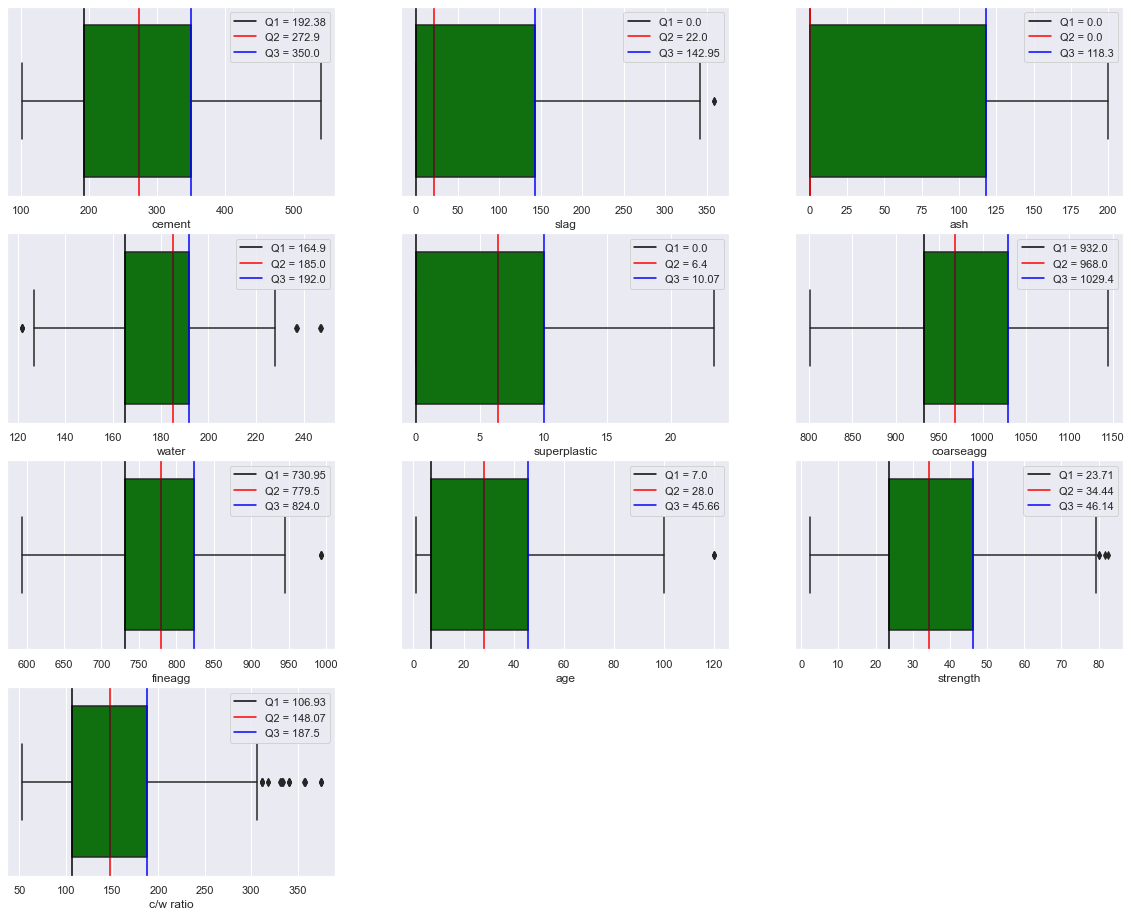

In [449]:
# Outlier Check
plt.figure(figsize= (20,16))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
for i in concrete_FE_df.columns:
    plt.subplot(4, 3, pos)
    ax=sns.boxplot(concrete_FE_df[i], color='green')
    plt.axvline(concrete_FE_df[i].quantile(0.25),linestyle="-",label='Q1 = {}'.format(round(concrete_FE_df[i].quantile(0.25),2)), color='black')
    plt.axvline(concrete_FE_df[i].quantile(0.5),linestyle="-", label='Q2 = {}'.format(round(concrete_FE_df[i].quantile(0.5),2)), color='red')
    plt.axvline(concrete_FE_df[i].quantile(0.75),linestyle="-",label='Q3 = {}'.format(round(concrete_FE_df[i].quantile(0.75),2)), color='blue')
    plt.legend()
    pos+=1

### As we know, c/w already has outliers (27 in number), superplastic imputed and no outlier. age was also imputed and outlier got reduced from 59 to 3. Let's use this to dataset to  fit GradientBoost and RandomForestand evaluate performance

In [580]:
# we will split the Target to a separate DF for the new extracted dataset
X5 = concrete_FE_df.drop('strength', axis=1)
y5 = concrete_FE_df['strength']
# Train : Test :: 70:30
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.30,random_state=1)
print(X5.shape, y5.shape, X5_train.shape, y5_train.shape, X5_test.shape, y5_test.shape)

(1030, 9) (1030,) (721, 9) (721,) (309, 9) (309,)


In [581]:
## RandomForest Regressor for Bagging based algorithm
iter5_RF=RandomForestRegressor(max_depth=4, random_state=3)
iter5_pipe7= make_pipeline(StandardScaler(), iter5_RF )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter5_pipe7.steps))
iter5_pipe7.fit(X5_train, y5_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=3))])

In [582]:
# METRICS
print("Train score: {:.3f}".format( iter5_pipe7.score( X5_train, y5_train)))
print("Test score: {:.3f}". format( iter5_pipe7.score( X5_test, y5_test)))
y5_pred = iter5_pipe7.predict(X5_test)
r2_score(y5_test, y5_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y5_test, y5_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y5_test,y5_pred)))


print('\nUSING KFOLD CROSS VALIDATION\n')
num_folds = 10
seed = 2
iter5_kfold7 = KFold(n_splits=num_folds, random_state=seed)
print(iter5_kfold7)
iter5_cv7 = cross_val_score(iter5_pipe7, X5, y5, cv=iter5_kfold7)
mean7 = round(iter5_cv7.mean(), 3)
std7 = round(iter5_cv7.std(), 3)
print(mean7, std7)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean7-(1.96*std7)
upper = mean7+(1.96*std7)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean7*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print(interval)

Train score: 0.831
Test score: 0.773
R2 score of Predicted Vs Actual: 0.773
The Root Mean Square Error (RMSE) :  8.13264207102315

USING KFOLD CROSS VALIDATION

KFold(n_splits=10, random_state=2, shuffle=False)
0.782 0.039
95.0 confidence interval 70.6% and 85.8% with a mean of 78.2
70.6 to 85.8


In [583]:
## ITERATION 5 Result Dataframe
iter5_results=pd.DataFrame(columns=['Model', 
                                    'Train_Score', 'Test_Score', 
                                    'R2_Score w/Predict', 'RMSE w/Predict',
                                    'KFold_Mean', 'KFold_Std',
                                    '95% Confidence Interval'
                                   ])
# Append values to Dataframe
iter5_results=iter5_results.append({
                'Model': 'Random Forest DEPTH 4',
                'Train_Score': round(iter5_pipe7.score( X5_train, y5_train)*100,3),
                'Test_Score': round(iter5_pipe7.score( X5_test, y5_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y5_test, y5_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y5_test,y5_pred)),3),
                'KFold_Mean': mean7*100,
                'KFold_Std': std7*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter5_results


Model  Train_Score  Test_Score  R2_Score w/Predict  \
0  Random Forest DEPTH 4       83.118      77.275              77.275   

   RMSE w/Predict  KFold_Mean  KFold_Std 95% Confidence Interval  
0           8.133        78.2        3.9            70.6 to 85.8

In [584]:
# Gradient Boosting
iter5_GB=GradientBoostingRegressor(max_depth=4, random_state=3) # using same parameters like RandomForest to see how effective
iter5_pipe8= make_pipeline(StandardScaler(), iter5_GB )  # define a pipeline. have standard scaler as scaling
print(" Pipeline steps:\ n{}". format( iter5_pipe8.steps))
iter5_pipe8.fit(X5_train, y5_train)

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(max_depth=4, random_state=3))]


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=4, random_state=3))])

In [585]:
# METRICS
print("Train score: {:.3f}".format( iter5_pipe8.score( X5_train, y5_train)))
print("Test score: {:.3f}". format( iter5_pipe8.score( X5_test, y5_test)))
y5_pred = iter5_pipe8.predict(X5_test)
r2_score(y5_test, y5_pred)
print("R2 score of Predicted Vs Actual: {:.3f}". format(r2_score(y5_test, y5_pred)))
print("The Root Mean Square Error (RMSE) : ", np.sqrt(mean_squared_error(y5_test,y5_pred)))

print("\n KFOLD CV \n")

num_folds = 10
seed = 2
iter5_kfold8 = KFold(n_splits=num_folds, random_state=seed)
print(iter5_kfold8)
iter5_cv8 = cross_val_score(iter5_pipe8, X5, y5, cv=iter5_kfold8)
mean8 = round(iter5_cv8.mean(), 3)
std8 = round(iter5_cv8.std(), 3)
print(mean8, std8)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean8-(1.96*std8)
upper = mean8+(1.96*std8)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean8*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

print(interval)

Train score: 0.973
Test score: 0.924
R2 score of Predicted Vs Actual: 0.924
The Root Mean Square Error (RMSE) :  4.702433033656083

 KFOLD CV 

KFold(n_splits=10, random_state=2, shuffle=False)
0.925 0.018
95.0 confidence interval 89.0% and 96.0% with a mean of 92.5
89.0 to 96.0


In [586]:
# Append values to Dataframe
iter5_results=iter5_results.append({
                'Model': 'Gradient Bosst(Depth 4 100 Estimators 0.1 LR)',
                'Train_Score': round(iter5_pipe8.score( X5_train, y5_train)*100,3),
                'Test_Score': round(iter5_pipe8.score( X5_test, y5_test)*100,3), 
                'R2_Score w/Predict': round(r2_score(y5_test, y5_pred)*100,3), 
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y5_test,y5_pred)),3),
                'KFold_Mean': mean8*100,
                'KFold_Std': std8*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

iter5_results


Model  Train_Score  Test_Score  \
0                          Random Forest DEPTH 4       83.118      77.275   
1  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.312      92.402   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              77.275           8.133        78.2        3.9   
1              92.402           4.702        92.5        1.8   

  95% Confidence Interval  
0            70.6 to 85.8  
1            89.0 to 96.0

#### Gradient boost on dataset that has columns fineagg, coarseagg, ash dropped

In [458]:
iter3_results.tail(1)

Model  Train_Score  Test_Score  \
2  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       96.922       90.69   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
2               90.69           5.205        91.9        2.0   

  95% Confidence Interval  
2            88.0 to 95.8

#### Gradient boost on dataset that has an extracted feature of 'cement-to-water ratio' to the original dataset without outlier imputation

In [457]:
iter4_results

Model  Train_Score  Test_Score  \
0  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.176      91.748   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              91.748           4.901        92.4        2.1   

  95% Confidence Interval  
0            88.3 to 96.5

#### Gradient boost on the original dataset with outlier imputation to age and superplastic features

In [455]:
iter2_results.tail(1)

Model  Train_Score  Test_Score  \
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.284      91.741   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
7              91.741           4.903        92.3        1.7   

  95% Confidence Interval  
7            89.0 to 95.6

#### Gradient boost on dataset that has an extracted feature of 'cement-to-water ratio' to the dataset that had outlier imputation done on age and superplastic features

In [587]:
iter5_results.tail(1)

Model  Train_Score  Test_Score  \
1  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.312      92.402   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
1              92.402           4.702        92.5        1.8   

  95% Confidence Interval  
1            89.0 to 96.0

## FINAL INFERENCE ON MODEL SELECTION:

- Clearly, from above we see that that the last GradientBoost on an outlier imputed (on superplastic and age) dataset with extracted feature (=c/w ratio) has BETTER test R2 (92.402%), the RMSE is also lower (4.702). The Cross validation mean score using KFOLD is 92.5 with standard deviation of 1.8. The 95% confidence interval is 89 to 96.0

- Removing column ash, coarseagg, fineagg - actually did not improve the performance but had marginal reduction.

### This can be further improved by addressing the outlier found in c/w ratio. And also experiments can be done by binning 'age' column.

## Hyperparameter Tuning via RandomizedSearchCV on Gradient Boost and Random Forest

In [515]:
## Typically we need to split into 3 sets - train, validation, and holdout test sets. This concrete dataset,
## we have only 1030 rows..we had already splot concrete_df to train (70%) the model and got the best model (Grid) 
## Now, the remaining 30% set, we will split again 50-50. The first half is validation and the second holdout.


X1 = concrete_df.drop('strength', axis=1)
y1 = concrete_df['strength']
# Train : Test :: 70:30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=1) # 70:30 with seed of11

In [516]:
## validation and holdout

X1_valid, X1_hold, y1_valid, y1_hold = train_test_split(X1_test, y1_test, test_size=0.50,random_state=1) 
# 50:50 with seed of 1

In [517]:
print(X1_valid.shape, y1_valid.shape)
print(X1_hold.shape, y1_hold.shape)

(154, 8) (154,)
(155, 8) (155,)


In [518]:
## Hyperparameter tuning for RandomForest using RandomizedSearchCV
RF=RandomForestRegressor(random_state=4)
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [520]:
HRF_pipe= make_pipeline(StandardScaler(), RF )  # not giving any parameter here except for random state.
print(" Pipeline steps:\ n{}". format( HRF_pipe.steps))

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(random_state=4))]


In [521]:
HRF_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=4))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=4),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n

In [522]:
# specify parameters and distributions to sample from
param_dist = {
    'randomforestregressor__ccp_alpha': [0.0, 0.5],
    'randomforestregressor__criterion': ['mse', 'mae'], 
    'randomforestregressor__max_depth': [4, 5, 6], 
    'randomforestregressor__max_features': ['sqrt', 'log2'], 
    'randomforestregressor__max_leaf_nodes': [5,6,7,8,9,10],
    'randomforestregressor__n_estimators': [100,150,200, 250]
}

In [523]:
# run randomized search

randomCV = RandomizedSearchCV(HRF_pipe, param_distributions=param_dist, n_iter=200, cv=10, verbose=2)
# no. of sample 200 and cv10

In [524]:
# fit the model with hyper params with valid data.
randomCV.fit(X1_valid, y1_valid)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV] 

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[C

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV] 

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[C

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV] 

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[C

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.4s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[C

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.4s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV] 

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[C

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[C

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[C

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=log2, randomforestregressor__max_depth=6, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=10, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=9, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=8, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.5 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=6, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.0 
[CV]  

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  6.9min finished


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=4))]),
                   n_iter=200,
                   param_distributions={'randomforestregressor__ccp_alpha': [0.0,
                                                                             0.5],
                                        'randomforestregressor__criterion': ['mse',
                                                                             'mae'],
                                        'randomforestregressor__max_depth': [4,
                                                                             5,
                                                                             6],
                                        'randomforestregressor__max_features': [

In [525]:
# Best Parameters
randomCV.best_params_

{'randomforestregressor__n_estimators': 100,
 'randomforestregressor__max_leaf_nodes': 10,
 'randomforestregressor__max_features': 'log2',
 'randomforestregressor__max_depth': 6,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__ccp_alpha': 0.5}

In [547]:
# Use the best parameters to instantiate an RF and then fit with the training data. 
rf = RandomForestRegressor(max_depth= 6, max_features= 'log2', max_leaf_nodes= 10, criterion='mse',  
                             n_estimators= 100, ccp_alpha=0.5)
rf.fit(X1_train, y1_train)

RandomForestRegressor(ccp_alpha=0.5, max_depth=6, max_features='log2',
                      max_leaf_nodes=10)

In [548]:
# use the rf and do KfoldCV
cv_score = cross_val_score(rf, X1, y1, cv = 10)
    

In [549]:
mean9 = round(cv_score.mean(), 3)
std9 = round(cv_score.std(), 3)
print(mean9, std9)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean9-(1.96*std9)
upper = mean9+(1.96*std9)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean9*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

print(interval)

0.724 0.028
95.0 confidence interval 66.9% and 77.9% with a mean of 92.5
66.9 to 77.9


In [552]:
iter1_results=iter1_results.append({
                'Model': 'Tuned Random CV with cv=10',
                'Train_Score': round(rf.score( X1_train, y1_train)*100,3),
                'Test_Score': round(rf.score( X1_hold, y1_hold)*100,3), # actual test from hold out
                'R2_Score w/Predict': round(r2_score(y1_hold, rf.predict(X1_hold))*100,3), # actual test with holdout
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_hold,rf.predict(X1_hold))),3),
                'KFold_Mean': mean9*100,
                'KFold_Std': std9*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)


In [553]:
iter1_results

Model  Train_Score  Test_Score  \
0                              Linear Regression       60.315      63.391   
1                               Lasso Regression       59.649      63.232   
2                       Poly Regression Degree 2       75.496      74.447   
3                Poly Linear Regression Degree 3       81.617      71.997   
4                 Poly Lasso Regression Degree 2       73.569      72.217   
5                 Poly Lasso Regression Degree 3       76.943      74.305   
6                          Random Forest DEPTH 4       82.466      75.687   
7  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.298      91.671   
8                                Tuned Random CV       76.212      69.855   
9                     Tuned Random CV with cv=10       76.271      71.086   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              63.390          10.320        59.2        7.3   
1              63.232          10.345        59.0        6.8   
2              74.447           8.624        72.0        4.6   
3              71.997           9.028        72.9        5.3   
4              72.217           8.992        70.4        5.1   
5              74.305           8.648        72.7        4.5   
6              75.687           8.412        76.8        3.2   
7              91.671           4.923        92.1        2.0   
8              69.855           9.367        72.2        1.9   
9              71.086           9.425        72.4        2.8   

        95% Confidence Interval  
0  44.891999999999996 to 73.508  
1   45.672 to 72.32799999999999  
2                  63.0 to 81.0  
3                  62.5 to 83.3  
4                  60.4 to 80.4  
5                  63.9 to 81.5  
6                  70.5 to 83.1  
7                  88.2 to 96.0  
8                  68.5 to 75.9  
9                  66.9 to 77.9

### The Chosen parameters while tuning hyperparameters tend to reduce the performance. Another set is required. Before that will move to Gradient boosting hyper parameter tuning

In [554]:
X1 = concrete_df.drop('strength', axis=1)
y1 = concrete_df['strength']
# Train : Test :: 70:30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=1) # 70:30 with seed of11

In [555]:
## validation and holdout

X1_valid, X1_hold, y1_valid, y1_hold = train_test_split(X1_test, y1_test, test_size=0.50,random_state=1) 
# 50:50 with seed of 1

In [556]:
print(X1_valid.shape, y1_valid.shape)
print(X1_hold.shape, y1_hold.shape)

(154, 8) (154,)
(155, 8) (155,)


In [557]:
## Hyperparameter tuning for GradientBoosting using RandomizedSearchCV
GB=GradientBoostingRegressor(random_state=4)
GB.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 4,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [558]:
HGB_pipe= make_pipeline(StandardScaler(), GB )  # not giving any parameter here except for random state.
print(" Pipeline steps:\ n{}". format( HGB_pipe.steps))

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(random_state=4))]


In [559]:
HGB_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingregressor', GradientBoostingRegressor(random_state=4))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingregressor': GradientBoostingRegressor(random_state=4),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_decrease': 0.0,
 'gradientboostingregressor__min_impurity_split': None,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min_sam

In [560]:
# specify parameters and distributions to sample from
param_dist = {
    'gradientboostingregressor__alpha': [0.5, 0.8, 0.9],
    'gradientboostingregressor__criterion': ['mse', 'mae', 'friedman_mse'], 
    'gradientboostingregressor__max_depth': [6, 7,8], 
    'gradientboostingregressor__max_features': ['sqrt', 'log2'], 
    'gradientboostingregressor__max_leaf_nodes': [5,6,7,8,9,10],
    'gradientboostingregressor__n_estimators': [100,150,200, 250],
    'gradientboostingregressor__learning_rate': [0.1, 0.2],
    'gradientboostingregressor__loss': ['ls', 'lad']
}

In [561]:
# run randomized search

randomCV = RandomizedSearchCV(HGB_pipe, param_distributions=param_dist, n_iter=200, cv=10, verbose=2)
# no. of sample 200 and cv10

In [562]:
# fit the model with hyper params with valid data.
randomCV.fit(X1_valid, y1_valid)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboo

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregresso

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.4s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.0s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboo

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboost

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboo

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboo

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregress

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregress

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregresso

[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criter

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.4s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.0s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criter

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregresso

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboo

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregresso

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboost

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criter

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboo

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.5 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  4.2min finished


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=4))]),
                   n_iter=200,
                   param_distributions={'gradientboostingregressor__alpha': [0.5,
                                                                             0.8,
                                                                             0.9],
                                        'gradientboostingregressor__criterion': ['mse',
                                                                                 'mae',
                                                                                 'friedman_mse'],
                                        'gradientboostingregressor__learning_rate': [0.1,
                                    

In [563]:
# Best Parameters
randomCV.best_params_

{'gradientboostingregressor__n_estimators': 150,
 'gradientboostingregressor__max_leaf_nodes': 6,
 'gradientboostingregressor__max_features': 'log2',
 'gradientboostingregressor__max_depth': 6,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__alpha': 0.8}

In [564]:
# Use the best parameters to instantiate an RF and then fit with the training data. 
gb = GradientBoostingRegressor(max_depth= 6, max_features= 'log2', max_leaf_nodes= 6, criterion='friedman_mse',  
                             n_estimators= 150, ccp_alpha=0.5, loss='ls', learning_rate=0.1, alpha=0.8)
gb.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.8, ccp_alpha=0.5, max_depth=6,
                          max_features='log2', max_leaf_nodes=6,
                          n_estimators=150)

In [565]:
# use the rf and do KfoldCV
cv_score = cross_val_score(gb, X1, y1, cv = 10)

In [567]:
mean10 = round(cv_score.mean(), 3)
std10 = round(cv_score.std(), 3)
print(mean10, std10)



## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean10-(1.96*std10)
upper = mean10+(1.96*std10)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean10*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)

print(interval)

0.874 0.025
95.0 confidence interval 82.5% and 92.3% with a mean of 87.4
82.5 to 92.30000000000001


In [570]:
iter1_results=iter1_results.append({
                'Model': 'Tuned Random CV for Gradient with cv=10',
                'Train_Score': round(gb.score( X1_train, y1_train)*100,3),
                'Test_Score': round(gb.score( X1_hold, y1_hold)*100,3), # actual test from hold out
                'R2_Score w/Predict': round(r2_score(y1_hold, gb.predict(X1_hold))*100,3), # actual test with holdout
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_hold,gb.predict(X1_hold))),3),
                'KFold_Mean': mean10*100,
                'KFold_Std': std10*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)
iter1_results

Model  Train_Score  Test_Score  \
0                               Linear Regression       60.315      63.391   
1                                Lasso Regression       59.649      63.232   
2                        Poly Regression Degree 2       75.496      74.447   
3                 Poly Linear Regression Degree 3       81.617      71.997   
4                  Poly Lasso Regression Degree 2       73.569      72.217   
5                  Poly Lasso Regression Degree 3       76.943      74.305   
6                           Random Forest DEPTH 4       82.466      75.687   
7   Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.298      91.671   
8                                 Tuned Random CV       76.212      69.855   
9                      Tuned Random CV with cv=10       76.271      71.086   
10                     Tuned Random CV with cv=10       91.402      88.422   
11          Tuned Random CV with cv=10 -Corrected       91.402      88.422   
12        Tuned Random CV for Gradient with cv=10       91.402      88.422   

    R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0               63.390          10.320        59.2        7.3   
1               63.232          10.345        59.0        6.8   
2               74.447           8.624        72.0        4.6   
3               71.997           9.028        72.9        5.3   
4               72.217           8.992        70.4        5.1   
5               74.305           8.648        72.7        4.5   
6               75.687           8.412        76.8        3.2   
7               91.671           4.923        92.1        2.0   
8               69.855           9.367        72.2        1.9   
9               71.086           9.425        72.4        2.8   
10              71.086           9.425        87.4        2.5   
11              88.422           5.964        87.4        2.5   
12              88.422           5.964        87.4        2.5   

         95% Confidence Interval  
0   44.891999999999996 to 73.508  
1    45.672 to 72.32799999999999  
2                   63.0 to 81.0  
3                   62.5 to 83.3  
4                   60.4 to 80.4  
5                   63.9 to 81.5  
6                   70.5 to 83.1  
7                   88.2 to 96.0  
8                   68.5 to 75.9  
9                   66.9 to 77.9  
10     82.5 to 92.30000000000001  
11     82.5 to 92.30000000000001  
12     82.5 to 92.30000000000001

### In the above please ignore rows #10 and #11 . 
#### Row #8 denotes RandomizedSearchCV for RandomForest. with CV=5 Row #9 denotes RandomizedSearchCV for RandomForest. with CV=10 And Row#12 denotes RandomizedSearcgCV for GradientBoosting.

# HYPERPARAMETER TUNING on the best dataset with best model GradientBoosting

## The best performance model was with GradientBoosting during Iteration 5 where we used the dataset with extracted feature of "c/w-ratio" and also imputed outliers for age and superplastic features. The result set is below

In [590]:
concrete_FE_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  c/w ratio  
0     29.89      69.43  
1     23.51     106.70  
2     29.22     133.40  
3     45.85     116.67  
4     18.29      80.08

In [589]:
iter5_results

Model  Train_Score  Test_Score  \
0                          Random Forest DEPTH 4       83.118      77.275   
1  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.312      92.402   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              77.275           8.133        78.2        3.9   
1              92.402           4.702        92.5        1.8   

  95% Confidence Interval  
0            70.6 to 85.8  
1            89.0 to 96.0

In [591]:
## Typically we need to split into 3 sets - train, validation, and holdout test sets. This concrete dataset,
## we have only 1030 rows..we had already splot concrete_df to train (70%) the model and got the best model (Grid) 
## Now, the remaining 30% set, we will split again 50-50. The first half is validation and the second holdout.


X1 = concrete_FE_df.drop('strength', axis=1)
y1 = concrete_FE_df['strength']
# Train : Test :: 70:30
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30,random_state=1) # 70:30 with seed of11

In [592]:
## validation and holdout with 50:50

X1_valid, X1_hold, y1_valid, y1_hold = train_test_split(X1_test, y1_test, test_size=0.50,random_state=1) 
# 50:50 with seed of 1

In [593]:
print(X1_train.shape, X1_valid.shape, X1_hold.shape)
print(y1_train.shape, y1_valid.shape, y1_hold.shape)

(721, 9) (154, 9) (155, 9)
(721,) (154,) (155,)


In [594]:
## Hyperparameter tuning for RandomForest using RandomizedSearchCV
RFH=RandomForestRegressor(random_state=4)
RFH.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [595]:
HRF_pipe1= make_pipeline(StandardScaler(), RFH )  # not giving any parameter here except for random state.
print(" Pipeline steps:\ n{}". format( HRF_pipe1.steps))

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor(random_state=4))]


In [596]:
HRF_pipe1.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=4))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=4),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_impurity_split': None,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n

In [597]:
# specify parameters and distributions to sample from
param_dist = {
    'randomforestregressor__ccp_alpha': [0.4, 0.6,],
    'randomforestregressor__criterion': ['mse', 'mae'], 
    'randomforestregressor__max_depth': [3, 4, 5], 
    'randomforestregressor__max_features': ['sqrt', 'log2'], 
    'randomforestregressor__max_leaf_nodes': [5,6,7],
    'randomforestregressor__n_estimators': [100,150,200, 250]
}

In [598]:
# run randomized search
randomCV_HRF = RandomizedSearchCV(HRF_pipe1, param_distributions=param_dist, n_iter=200, cv=10, verbose=2)
# no. of sample 200 and cv 10

In [599]:
# eval model for hyper params with valid data.
randomCV_HRF.fit(X1_valid, y1_valid)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] r

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=log2, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=log2, randomforestregressor__max_depth=4, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4, total=   0.1s
[CV] randomforestregressor__n_estimators=100, randomforestregressor__max_leaf_nodes=6, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=3, randomforestregressor__criterion=mse, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6, total=   0.2s
[CV] randomforestregressor__n_estimators=150, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.6 
[CV]  

[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.3s
[CV] randomforestregressor__n_estimators=200, randomforestregressor__max_leaf_nodes=5, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.5s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4, total=   0.4s
[CV] randomforestregressor__n_estimators=250, randomforestregressor__max_leaf_nodes=7, randomforestregressor__max_features=sqrt, randomforestregressor__max_depth=5, randomforestregressor__criterion=mae, randomforestregressor__ccp_alpha=0.4 
[CV]  

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  7.4min finished


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=4))]),
                   n_iter=200,
                   param_distributions={'randomforestregressor__ccp_alpha': [0.4,
                                                                             0.6],
                                        'randomforestregressor__criterion': ['mse',
                                                                             'mae'],
                                        'randomforestregressor__max_depth': [3,
                                                                             4,
                                                                             5],
                                        'randomforestregressor__max_features': [

In [600]:
# Best Parameters
randomCV_HRF.best_params_

{'randomforestregressor__n_estimators': 150,
 'randomforestregressor__max_leaf_nodes': 7,
 'randomforestregressor__max_features': 'log2',
 'randomforestregressor__max_depth': 5,
 'randomforestregressor__criterion': 'mse',
 'randomforestregressor__ccp_alpha': 0.6}

In [601]:
# Use the best parameters to instantiate an RF and then fit with the training data. 
rf1 = RandomForestRegressor(max_depth= 5, max_features= 'log2', max_leaf_nodes= 7, criterion='mse',  
                             n_estimators= 150, ccp_alpha=0.6)
rf1.fit(X1_train, y1_train)

RandomForestRegressor(ccp_alpha=0.6, max_depth=5, max_features='log2',
                      max_leaf_nodes=7, n_estimators=150)

In [602]:
# use the rf and do KfoldCV
cv_score1 = cross_val_score(rf1, X1, y1, cv = 10) 

In [603]:
mean9 = round(cv_score1.mean(), 3)
std9 = round(cv_score1.std(), 3)
print(mean9, std9)
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean9-(1.96*std9)
upper = mean9+(1.96*std9)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean9*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print(interval)

0.675 0.039
95.0 confidence interval 59.9% and 75.1% with a mean of 67.5
59.9 to 75.1


In [604]:
iter5_results

Model  Train_Score  Test_Score  \
0                          Random Forest DEPTH 4       83.118      77.275   
1  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.312      92.402   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              77.275           8.133        78.2        3.9   
1              92.402           4.702        92.5        1.8   

  95% Confidence Interval  
0            70.6 to 85.8  
1            89.0 to 96.0

In [605]:
iter5_results=iter5_results.append({
                'Model': 'RandomizedSearchCV Tuned RandomForest',
                'Train_Score': round(rf1.score(X1_train, y1_train)*100,3),
                'Test_Score': round(rf1.score(X1_hold, y1_hold)*100,3), # actual test from hold out
                'R2_Score w/Predict': round(r2_score(y1_hold, rf1.predict(X1_hold))*100,3), # actual test with holdout
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_hold,rf1.predict(X1_hold))),3),
                'KFold_Mean': mean9*100,
                'KFold_Std': std9*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)

In [606]:
iter5_results

Model  Train_Score  Test_Score  \
0                          Random Forest DEPTH 4       83.118      77.275   
1  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.312      92.402   
2          RandomizedSearchCV Tuned RandomForest       71.184      65.173   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              77.275           8.133        78.2        3.9   
1              92.402           4.702        92.5        1.8   
2              65.173          10.344        67.5        3.9   

  95% Confidence Interval  
0            70.6 to 85.8  
1            89.0 to 96.0  
2            59.9 to 75.1

## With the choice of parameters for hypertuning, the performance reduced for RandomForest. Different selections need to be tried to squeeze out the performance.

In [607]:
## Hyperparameter tuning for GradientBoosting using RandomizedSearchCV
GB1=GradientBoostingRegressor(random_state=4)
GB1.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 4,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [608]:
HGB_pipe1= make_pipeline(StandardScaler(), GB1)  # not giving any parameter here except for random state.
print(" Pipeline steps:\ n{}". format(HGB_pipe1.steps))

 Pipeline steps:\ n[('standardscaler', StandardScaler()), ('gradientboostingregressor', GradientBoostingRegressor(random_state=4))]


In [609]:
HGB_pipe1.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('gradientboostingregressor', GradientBoostingRegressor(random_state=4))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'gradientboostingregressor': GradientBoostingRegressor(random_state=4),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'gradientboostingregressor__alpha': 0.9,
 'gradientboostingregressor__ccp_alpha': 0.0,
 'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__init': None,
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__max_depth': 3,
 'gradientboostingregressor__max_features': None,
 'gradientboostingregressor__max_leaf_nodes': None,
 'gradientboostingregressor__min_impurity_decrease': 0.0,
 'gradientboostingregressor__min_impurity_split': None,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__min_sam

In [610]:
# specify parameters and distributions to sample from
param_dist = {
    'gradientboostingregressor__alpha': [0.8, 0.9],
    'gradientboostingregressor__criterion': ['mse', 'mae', 'friedman_mse'], 
    'gradientboostingregressor__max_depth': [6,7,8], 
    'gradientboostingregressor__max_features': ['sqrt', 'log2'], 
    'gradientboostingregressor__max_leaf_nodes': [5,6,7,8,9,10],
    'gradientboostingregressor__n_estimators': [100,150,200, 250],
    'gradientboostingregressor__learning_rate': [0.1, 0.2],
    'gradientboostingregressor__loss': ['ls', 'lad']
}

In [611]:
# run randomized search

randomCV_GB1 = RandomizedSearchCV(HGB_pipe1, param_distributions=param_dist, n_iter=200, cv=10, verbose=2)
# no. of sample 200 and cv10

In [612]:
# fit the model with hyper params with valid data.
randomCV_GB1.fit(X1_valid, y1_valid)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboosti

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.4s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboosting

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criteri

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregress

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.4s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregresso

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboosting

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregress

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboo

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboo

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboosti

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.4s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__cr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboosti

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboost

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboo

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingre

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.2, gradientboostingr

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=8, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregress

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=8, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=9, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9, total=   0.1s
[CV] gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mae, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=100, gradientboostingregressor__max_leaf_nodes=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9, total=   0.2s
[CV] gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=200, gradientboostingregressor__max_leaf_nodes=7, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__max_depth=7, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__crite

[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8, total=   0.0s
[CV] gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterion=mse, gradientboostingregressor__alpha=0.8 
[CV]  gradientboostingregressor__n_estimators=150, gradientboostingregressor__max_leaf_nodes=6, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=ls, gradientboostingregressor__learning_rate=0.1, gradientboostingregressor__criterio

[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9, total=   0.3s
[CV] gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboostingregressor__criterion=friedman_mse, gradientboostingregressor__alpha=0.9 
[CV]  gradientboostingregressor__n_estimators=250, gradientboostingregressor__max_leaf_nodes=10, gradientboostingregressor__max_features=log2, gradientboostingregressor__max_depth=6, gradientboostingregressor__loss=lad, gradientboostingregressor__learning_rate=0.2, gradientboo

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:  5.0min finished


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=4))]),
                   n_iter=200,
                   param_distributions={'gradientboostingregressor__alpha': [0.8,
                                                                             0.9],
                                        'gradientboostingregressor__criterion': ['mse',
                                                                                 'mae',
                                                                                 'friedman_mse'],
                                        'gradientboostingregressor__learning_rate': [0.1,
                                                                                     0.2],
                           

In [613]:
# Best Parameters
randomCV_GB1.best_params_

{'gradientboostingregressor__n_estimators': 250,
 'gradientboostingregressor__max_leaf_nodes': 5,
 'gradientboostingregressor__max_features': 'log2',
 'gradientboostingregressor__max_depth': 6,
 'gradientboostingregressor__loss': 'ls',
 'gradientboostingregressor__learning_rate': 0.1,
 'gradientboostingregressor__criterion': 'mse',
 'gradientboostingregressor__alpha': 0.8}

In [614]:
# Use the best parameters to instantiate an RF and then fit with the training data. 
gb1 = GradientBoostingRegressor(max_depth= 6, max_features= 'log2', max_leaf_nodes= 5, criterion='mse',  
                             n_estimators= 250, loss='ls', learning_rate=0.1, alpha=0.8)
gb1.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.8, criterion='mse', max_depth=6,
                          max_features='log2', max_leaf_nodes=5,
                          n_estimators=250)

In [615]:
# use the rf and do KfoldCV
cv_score2 = cross_val_score(gb1, X1, y1, cv = 10)

In [616]:
mean11 = round(cv_score2.mean(), 3)
std11 = round(cv_score2.std(), 3)
print(mean11, std11)
## Confidence Interval
alpha = 95                          # for 95% confidence 
lower = mean11-(1.96*std11)
upper = mean11+(1.96*std11)
print('%.1f confidence interval %.1f%% and %.1f%% with a mean of %.1f' % (alpha, lower*100, upper*100, mean11*100))
interval=str(round(lower,3)*100) + " to " + str(round(upper,3)*100)
print(interval)

0.928 0.017
95.0 confidence interval 89.5% and 96.1% with a mean of 92.8
89.5 to 96.1


In [617]:
iter5_results=iter5_results.append({
                'Model': 'RandomizedSearchCV Tuned GradientBoosting',
                'Train_Score': round(gb1.score(X1_train, y1_train)*100,3),
                'Test_Score': round(gb1.score(X1_hold, y1_hold)*100,3), # actual test from hold out
                'R2_Score w/Predict': round(r2_score(y1_hold, gb1.predict(X1_hold))*100,3), # actual test with holdout
                'RMSE w/Predict': round(np.sqrt(mean_squared_error(y1_hold,gb1.predict(X1_hold))),3),
                'KFold_Mean': mean11*100,
                'KFold_Std': std11*100,
                '95% Confidence Interval' : interval
},ignore_index=True
)
iter5_results



Model  Train_Score  Test_Score  \
0                          Random Forest DEPTH 4       83.118      77.275   
1  Gradient Bosst(Depth 4 100 Estimators 0.1 LR)       97.312      92.402   
2          RandomizedSearchCV Tuned RandomForest       71.184      65.173   
3      RandomizedSearchCV Tuned GradientBoosting       96.617      93.188   

   R2_Score w/Predict  RMSE w/Predict  KFold_Mean  KFold_Std  \
0              77.275           8.133        78.2        3.9   
1              92.402           4.702        92.5        1.8   
2              65.173          10.344        67.5        3.9   
3              93.188           4.575        92.8        1.7   

  95% Confidence Interval  
0            70.6 to 85.8  
1            89.0 to 96.0  
2            59.9 to 75.1  
3            89.5 to 96.1

# FINAL INFERENCE AFTER HYPERPARAMETER TUNING:

### From above dataframe we see that with the below selected hyperparameters we were able to increased the performance of the Gradient Boosting on the given dataset (original dataset with additional predictor based on feature extraction and imputation of outlier). 
- 'gradientboostingregressor__n_estimators': 250,
- 'gradientboostingregressor__max_leaf_nodes': 5,
- 'gradientboostingregressor__max_features': 'log2',
- 'gradientboostingregressor__max_depth': 6,
- 'gradientboostingregressor__loss': 'ls',
- 'gradientboostingregressor__learning_rate': 0.1,
- 'gradientboostingregressor__criterion': 'mse',
- 'gradientboostingregressor__alpha': 0.8}

### Metrics:
- R2 score on hold out set : 93.188
- RMSE with predict and actual : 4.575
- KFOLD MEAN CV Score : 92.8
- KFOLD STD CV Score : 1.7
- 95% Confidence internal is 89 to 96.1

### Step 5 : Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks) 

R2 Score denotes the variability of the data accounted for by the regression model. It is the square of R-correlation co-efficient. R2 value lies between 0 and +1. Higher the value of R2 towards 1 (100%), better the line fits and explains the data. The residual erros also will be less for higher R2 values. When the business case is for predicting a target variable (like here the concrete strength), it is desirable that the model has a high score of R2 as it denotes low residual errors.. In this csa

If R2 value is say (in our case for Gradient Boost for the given set) 93.18%. This means that 93% of the data fits the line and hence it is a better model. Higher the R2 value, better the performance of the line especially for business cases that predicts a value.

Low R2 in turn denotes higher residual errors and more deviation of the data from the line and more deviant the prediction. As R2 value increases from a low value, the residual errors decrease and line fits better.

### Step 6: Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation.

From the Exploratory Data Analysis (both Univariate, Bi-variate (between response and predictors and also correlation between the predictors), I was able to deduce that 

- cement, superplastic, age, water are strong predictors for the strength. Higher the cement and superplastic ratio better the strength. And at the same water should be optimal. age of the mixture also needs to be optimal - not too aged and not too fresh.

- Based on the feature engineering that I did in getting the cement-to-water ratio which in turn made th performance of model better, we see that this ratio inherently is proportional to strength. Higher cement and lesser water content better the strength.

- So, business should think about properly mixing the cement and water in an appropriate ratio and also mixing with superplasticizer and setting for required amount of days.

- The other predictors which are weak predictors - like ash, coarseagg,fineagg - don't really influence strength of the concrete. Less time can be spent in collecting and analyzing the data. Slag has weak predicting ability. This can be used for the mixture composition

- With the above recommendations, the field can be advised for the optimal mixture of components to maximize the strength and at the same to avoid cost of both time and money in procuring less or no relative strength influencer.